In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.api.types as ptypes

games = pd.read_csv('./PS-2025.1/Data/campeonatos_futebol_atualizacao.csv')

games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27716 entries, 0 to 27715
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Chutes a gol 1       26204 non-null  float64
 1   Chutes a gol 2       26204 non-null  float64
 2   Impedimentos 1       24942 non-null  float64
 3   Impedimentos 2       24942 non-null  float64
 4   Escanteios 1         25388 non-null  float64
 5   Escanteios 2         25388 non-null  float64
 6   Chutes fora 1        25392 non-null  float64
 7   Chutes fora 2        25392 non-null  float64
 8   Faltas 1             25394 non-null  float64
 9   Faltas 2             25394 non-null  float64
 10  Cartões amarelos 1   27716 non-null  float64
 11  Cartões amarelos 2   27716 non-null  float64
 12  Cartões vermelhos 1  27716 non-null  float64
 13  Cartões vermelhos 2  27716 non-null  float64
 14  Cruzamentos 1        9015 non-null   float64
 15  Cruzamentos 2        9015 non-null  

In [103]:
print(games.head(20))

    Chutes a gol 1  Chutes a gol 2  Impedimentos 1  Impedimentos 2  \
0              8.0             0.0             6.0             3.0   
1              0.0             2.0             0.0             2.0   
2              4.0             5.0             1.0             5.0   
3              4.0             7.0             8.0             1.0   
4              3.0             1.0             1.0             3.0   
5              5.0             5.0             1.0             0.0   
6              2.0             2.0             0.0             1.0   
7              3.0             4.0             5.0             1.0   
8             15.0             0.0             0.0             4.0   
9              4.0             3.0             2.0             1.0   
10             4.0             5.0             4.0             1.0   
11             6.0             0.0             2.0             2.0   
12             3.0             6.0             0.0             1.0   
13            12.0  

## Dicionário de dados

|    | Colunas             | Tipo de dados   | Descrição                                                                                             |   Resultados Iniciais | Hipóteses                                                                                                                                                                                              |
|---:|:--------------------|:----------------|:------------------------------------------------------------------------------------------------------|----------------------:|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  0 | Chutes a gol 1      | float64         | Número de finalizações que foram enquadradas (ao menos foram na direção do gol) pelo time 1 / time 2. |                   nan | Tem missing? Qual a relação com o número de gols? Tem um desvio padrão baixo em relação ao número de chutes a gol e ao número de gols?                                                                 |
|  1 | Chutes a gol 2      | float64         | Número de finalizações que foram enquadradas (ao menos foram na direção do gol) pelo time 1 / time 2. |                   nan | Tem missing? Qual a relação com o número de gols? Tem um desvio padrão baixo em relação ao número de chutes a gol e ao número de gols?                                                                 |
|  2 | Impedimentos 1      | float64         | Quantas vezes cada time foi pego em posição de impedimento.                                           |                   nan | Tem missing? Qual a relação com tiro de meta? Tem relação negativa com o número de gols?                                                                                                               |
|  3 | Impedimentos 2      | float64         | Quantas vezes cada time foi pego em posição de impedimento.                                           |                   nan | Tem missing? Qual a relação com tiro de meta? Tem relação negativa com o número de gols?                                                                                                               |
|  4 | Escanteios 1        | float64         | Total de cobranças de escanteio a favor de cada equipe.                                               |                   nan | Tem missing? Qual o impacto dos escanteios nos gols? É algum indicativo de que o time está com melhor ataque? Isso reduz ou aumenta o número de gols nas partidas? Tem relação com chutes bloqueados?  |
|  5 | Escanteios 2        | float64         | Total de cobranças de escanteio a favor de cada equipe.                                               |                   nan | Tem missing? Qual o impacto dos escanteios nos gols? É algum indicativo de que o time está com melhor ataque? Isso reduz ou aumenta o número de gols nas partidas? Tem relação com chutes bloqueados?  |
|  6 | Chutes fora 1       | float64         | Finalizações que não foram na direção do gol (para fora) de cada time.                                |                   nan | Tem missing? Tem relação com o número de gols? Tem relação com a força do ataque do time?                                                                                                              |
|  7 | Chutes fora 2       | float64         | Finalizações que não foram na direção do gol (para fora) de cada time.                                |                   nan | Tem missing? Tem relação com o número de gols? Tem relação com a força do ataque do time?                                                                                                              |
|  8 | Faltas 1            | float64         | Quantas faltas cada time cometeu durante a partida.                                                   |                   nan | Tem missing?                                                                                                                                                                                           |
|  9 | Faltas 2            | float64         | Quantas faltas cada time cometeu durante a partida.                                                   |                   nan | Tem missing?                                                                                                                                                                                           |
| 10 | Cartões amarelos 1  | float64         | Quantos cartões amarelos foram mostrados a jogadores de cada time.                                    |                   nan | Tem missing?                                                                                                                                                                                           |
| 11 | Cartões amarelos 2  | float64         | Quantos cartões amarelos foram mostrados a jogadores de cada time.                                    |                   nan | Tem missing?                                                                                                                                                                                           |
| 12 | Cartões vermelhos 1 | float64         | Quantos cartões vermelhos foram mostrados a jogadores de cada time.                                   |                   nan | Tem missing?                                                                                                                                                                                           |
| 13 | Cartões vermelhos 2 | float64         | Quantos cartões vermelhos foram mostrados a jogadores de cada time.                                   |                   nan | Tem missing?                                                                                                                                                                                           |
| 14 | Cruzamentos 1       | float64         | Número de passes laterais elevados (cruzamentos) realizados por cada equipe.                          |                   nan | Tem missing? Tem relação com chutes a gol/chutes para fora/gols? Tem relação com impedimento/tiro de meta?                                                                                             |
| 15 | Cruzamentos 2       | float64         | Número de passes laterais elevados (cruzamentos) realizados por cada equipe.                          |                   nan | Tem missing? Tem relação com chutes a gol/chutes para fora/gols? Tem relação com impedimento/tiro de meta?                                                                                             |
| 16 | Laterais 1          | float64         | Quantas vezes cada time executou arremessos laterais.                                                 |                   nan | Tem missing?                                                                                                                                                                                           |
| 17 | Laterais 2          | float64         | Quantas vezes cada time executou arremessos laterais.                                                 |                   nan | Tem missing?                                                                                                                                                                                           |
| 18 | Chutes bloqueados 1 | float64         | Finalizações de cada time que foram bloqueadas por defensores adversários.                            |                   nan | Tem missing? Tem relação com os contra-ataques? Tem relação com faltas?                                                                                                                                |
| 19 | Chutes bloqueados 2 | float64         | Finalizações de cada time que foram bloqueadas por defensores adversários.                            |                   nan | Tem missing? Tem relação com os contra-ataques? Tem relação com faltas?                                                                                                                                |
| 20 | Contra-ataques 1    | float64         | Quantas ações de contra-ataque (recuperação e transição rápida) cada equipe conduziu.                 |                   nan | Tem missing? Qual a relação do número de contra-ataques com a frequência de gols/chutes a gol?                                                                                                         |
| 21 | Contra-ataques 2    | float64         | Quantas ações de contra-ataque (recuperação e transição rápida) cada equipe conduziu.                 |                   nan | Tem missing? Qual a relação do número de contra-ataques com a frequência de gols/chutes a gol?                                                                                                         |
| 22 | Gols 1              | float64         | Número de gols marcados por cada time.                                                                |                   nan | Tem missing? Quais variáveis estão mais fortemente relacionadas com o número de gols?                                                                                                                  |
| 23 | Gols 2              | float64         | Número de gols marcados por cada time.                                                                |                   nan | Tem missing? Quais variáveis estão mais fortemente relacionadas com o número de gols?                                                                                                                  |
| 24 | Tiro de meta 1      | float64         | Quantos arremessos de meta (goal kicks) cada time cobrou.                                             |                   nan | Tem missing? É diretamente relacionado com os chutes para fora? Tem alguma relação com chutes a gol/chutes bloqueados?                                                                                 |
| 25 | Tiro de meta 2      | float64         | Quantos arremessos de meta (goal kicks) cada time cobrou.                                             |                   nan | Tem missing? É diretamente relacionado com os chutes para fora? Tem alguma relação com chutes a gol/chutes bloqueados?                                                                                 |
| 26 | Tratamentos 1       | float64         | Quantas vezes jogadores de cada time receberam atendimento médico em campo.                           |                   nan | Tem missing? Tem relação negativa com chutes e tentativas de gols?                                                                                                                                     |
| 27 | Tratamentos 2       | float64         | Quantas vezes jogadores de cada time receberam atendimento médico em campo.                           |                   nan | Tem missing? Tem relação negativa com chutes e tentativas de gols?                                                                                                                                     |
| 28 | Substituições 1     | float64         | Número de trocas de jogadores realizadas por cada equipe.                                             |                   nan | Tem missing? Tem alguma alteração com o número de gols quando há mais substituições?                                                                                                                   |
| 29 | Substituições 2     | float64         | Número de trocas de jogadores realizadas por cada equipe.                                             |                   nan | Tem missing? Tem alguma alteração com o número de gols quando há mais substituições?                                                                                                                   |
| 30 | Tiros-livres 1      | float64         | Quantas cobranças de falta (tiros livres) cada time teve.                                             |                   nan | Tem missing? Tem alguma relação com o número de gols? Tem relação negativa com o número de chutes para fora/chutes a gol?                                                                              |
| 31 | Tiros-livres 2      | float64         | Quantas cobranças de falta (tiros livres) cada time teve.                                             |                   nan | Tem missing? Tem alguma relação com o número de gols? Tem relação negativa com o número de chutes para fora/chutes a gol?                                                                              |
| 32 | Defesas difíceis 1  | float64         | Número de defesas de alta dificuldade feitas pelos goleiros de cada time.                             |                   nan | Tem missing?                                                                                                                                                                                           |
| 33 | Defesas difíceis 2  | float64         | Número de defesas de alta dificuldade feitas pelos goleiros de cada time.                             |                   nan | Tem missing?                                                                                                                                                                                           |
| 34 | Posse 1(%)          | float64         | Percentual de tempo de posse de bola de cada equipe ao longo da partida.                              |                   nan | Tem missing?                                                                                                                                                                                           |
| 35 | Posse 2(%)          | float64         | Percentual de tempo de posse de bola de cada equipe ao longo da partida.                              |                   nan | Tem missing?                                                                                                                                                                                           |
| 36 | Time 1              | string          | Nome do time da casa (1) e do time visitante (2).                                                     |                   nan | Tem missing? É somente para identificar os times? Precisa de uma métrica para performance? Tem times com performance melhor? Quais times se relacionam melhor com determinadas métricas do que outros? |
| 37 | Time 2              | string          | Nome do time da casa (1) e do time visitante (2).                                                     |                   nan | Tem missing? É somente para identificar os times? Precisa de uma métrica para performance? Tem times com performance melhor? Quais times se relacionam melhor com determinadas métricas do que outros? |
| 38 | Position 1          | string          | Posição tática inicial ou formação de cada equipe (por exemplo: 4-4-2, 3-5-2 etc.).                   |                   nan | Tem missing? Qual o impacto disso nas vitórias dos times? Impacta mais quais equipes? É relevante olhar inicialmente?                                                                                  |
| 39 | Position 2          | string          | Posição tática inicial ou formação de cada equipe (por exemplo: 4-4-2, 3-5-2 etc.).                   |                   nan | Tem missing? Qual o impacto disso nas vitórias dos times? Impacta mais quais equipes? É relevante olhar inicialmente?                                                                                  |

In [104]:
unique_teams = pd.concat([games['Time 1'], games['Time 2']]).unique()

num_unique_teams = len(unique_teams)
print(f'Number of unique teams: {num_unique_teams}')

Number of unique teams: 310


In [105]:
percentage_missing_rows = games.isna().sum()/games.shape[0] * 100
percentage_missing_rows

Chutes a gol 1          5.455333
Chutes a gol 2          5.455333
Impedimentos 1         10.008659
Impedimentos 2         10.008659
Escanteios 1            8.399480
Escanteios 2            8.399480
Chutes fora 1           8.385048
Chutes fora 2           8.385048
Faltas 1                8.377832
Faltas 2                8.377832
Cartões amarelos 1      0.000000
Cartões amarelos 2      0.000000
Cartões vermelhos 1     0.000000
Cartões vermelhos 2     0.000000
Cruzamentos 1          67.473661
Cruzamentos 2          67.473661
Laterais 1             45.277096
Laterais 2             45.277096
Chutes bloqueados 1    68.094242
Chutes bloqueados 2    68.094242
Contra-ataques 1       77.402944
Contra-ataques 2       77.402944
Gols 1                  0.000000
Gols 2                  0.000000
Tiro de meta 1         56.649589
Tiro de meta 2         56.649589
Tratamentos 1          81.891326
Tratamentos 2          81.891326
Substituições 1        66.012412
Substituições 2        66.012412
Tiros-livr

In [106]:
filtered_columns_by_missing = percentage_missing_rows[percentage_missing_rows <= 11]
filtered_columns_by_missing

Chutes a gol 1          5.455333
Chutes a gol 2          5.455333
Impedimentos 1         10.008659
Impedimentos 2         10.008659
Escanteios 1            8.399480
Escanteios 2            8.399480
Chutes fora 1           8.385048
Chutes fora 2           8.385048
Faltas 1                8.377832
Faltas 2                8.377832
Cartões amarelos 1      0.000000
Cartões amarelos 2      0.000000
Cartões vermelhos 1     0.000000
Cartões vermelhos 2     0.000000
Gols 1                  0.000000
Gols 2                  0.000000
Posse 1(%)              8.478857
Posse 2(%)              8.478857
Time 1                  0.000000
Time 2                  0.000000
Position 1              5.780055
Position 2              5.881080
dtype: float64

In [107]:
def criar_coluna_resultado(df):
    """
    Cria uma coluna 'Resultado' em um DataFrame com base nas colunas 'Gols 1' e 'Gols 2'.
  
    Args:
      df: DataFrame do pandas contendo as colunas 'Gols 1' e 'Gols 2'.
  
    Returns:
      DataFrame com a nova coluna 'Resultado'.
    """
    def determinar_resultado(row):
      if row['Gols 1'] > row['Gols 2']:
        return 'Casa'
      elif row['Gols 1'] < row['Gols 2']:
        return 'Visitante'
      else:
        return 'Empate'
  
    df['Resultado'] = df.apply(determinar_resultado, axis=1)
    return df

games = criar_coluna_resultado(games)
games

,Chutes a gol 1,Chutes a gol 2,Impedimentos 1,Impedimentos 2,Escanteios 1,Escanteios 2,Chutes fora 1,Chutes fora 2,Faltas 1,Faltas 2,...,Tiros-livres 2,Defesas difíceis 1,Defesas difíceis 2,Posse 1(%),Posse 2(%),Time 1,Time 2,Position 1,Position 2,Resultado
0,8.0,0.0,6.0,3.0,7.0,1.0,6.0,1.0,8.0,14.0,...,NaN,NaN,NaN,77.0,23.0,Glasgow Rangers,Livingston,4-3-3,4-3-3,Casa
1,0.0,2.0,0.0,2.0,0.0,4.0,3.0,4.0,19.0,14.0,...,NaN,NaN,NaN,44.0,56.0,Ross County,St.Johnstone,3-5-2,3-5-2,Empate
2,4.0,5.0,1.0,5.0,8.0,11.0,2.0,5.0,13.0,14.0,...,NaN,NaN,NaN,47.0,53.0,Dundee FC,St. Mirren,4-3-3,3-4-1-2,Empate
3,4.0,7.0,8.0,1.0,6.0,5.0,4.0,7.0,4.0,11.0,...,NaN,NaN,NaN,27.0,73.0,Hearts,Celtic,3-4-3,4-2-3-1,Casa
4,3.0,1.0,1.0,3.0,5.0,4.0,2.0,2.0,12.0,17.0,...,NaN,NaN,NaN,58.0,42.0,Aberdeen,Dundee U.,4-4-2,3-5-1-1,Casa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27711,6.0,2.0,1.0,0.0,9.0,6.0,6.0,5.0,7.0,7.0,...,NaN,NaN,NaN,52.0,48.0,Aston Villa,Blackburn,4-4-2,4-5-1,Visitante
27712,6.0,0.0,4.0,3.0,4.0,2.0,8.0,2.0,11.0,9.0,...,NaN,NaN,NaN,52.0,48.0,Arsenal,Fulham,4-2-3-1,4-4-2,Casa
27713,7.0,7.0,2.0,3.0,10.0,2.0,8.0,0.0,10.0,6.0,...,NaN,NaN,NaN,55.0,45.0,Manchester Utd,Stoke,4-4-2,4-4-2,Casa
27714,6.0,6.0,1.0,2.0,4.0,3.0,4.0,6.0,5.0,3.0,...,NaN,NaN,NaN,45.0,55.0,West Ham,Manchester City,4-5-1,4-4-2,Empate


- Para os dados faltantes, será que podemos assumir dois datasets diferentes?
  - Um dataset com menos dados, contendo as colunas mais populadas, focando em relações mais simples
  - Um dataset com mais dados, contendo a maioria das colunas, focando em relações que evidenciem detalhes e suportem hipóteses do dataset anterior
- Por exemplo, será que defesas difíceis revelam um número menor de gols, mesmo com um ataque forte (alta frequência de chutes fora e no gol)?

# Análise Univariada

## Definindo funções auxiliares para calcular estatísticas descritivas e gerar gráficos para variáveis contínuas e categóricas

In [108]:
def univariada_variavel_numerica(dado: pd.DataFrame, variaveis: list):
    """
    Gera análises univariadas (estatísticas descritivas e gráficos) para
    uma ou mais variáveis numéricas fornecidas em uma lista.

    Exibe uma tabela comparativa com as estatísticas descritivas de todas as variáveis.
    Em seguida, exibe os gráficos (Histograma com KDE, Gráfico de violino,
    Box plot, Box plot com pontos sobrepostos) para todas as variáveis lado a lado.
    A grid de gráficos terá 4 linhas (um por tipo de gráfico) e N colunas
    (uma por variável), onde N é o número de variáveis fornecidas.

    Parâmetros:
        dado (pd.DataFrame): Base de dados contendo as variáveis.
        variaveis (list): Uma lista contendo os nomes de uma ou mais variáveis
                          numéricas a serem analisadas (ex: ['coluna1'], ['colunaA', 'colunaB', ...]).

    Retorna:
        None

    Exemplo de uso:
        >> dado = pd.DataFrame({
        >>    "variavel_exemplo1": np.random.normal(loc=50, scale=10, size=100),
        >>    "variavel_exemplo2": np.random.normal(loc=60, scale=15, size=100),
        >>    "variavel_exemplo3": np.random.normal(loc=40, scale=5, size=100)
        >> })
        >> univariada_variavel_numerica(dado, ["variavel_exemplo1"]) # Apenas uma variável
        >> univariada_variavel_numerica(dado, ["variavel_exemplo2", "variavel_exemplo3"]) # Duas variáveis
        >> univariada_variavel_numerica(dado, ["variavel_exemplo1", "variavel_exemplo2", "variavel_exemplo3"]) # Três variáveis
    """
    # --- Validação de Input ---
    if not isinstance(variaveis, list) or len(variaveis) < 1:
        raise ValueError("O parâmetro 'variaveis' deve ser uma lista contendo pelo menos 1 nome de variável.")

    num_vars = len(variaveis)

    for var in variaveis:
        if var not in dado.columns:
            raise ValueError(f"A variável '{var}' não foi encontrada no DataFrame.")
        if not ptypes.is_numeric_dtype(dado[var]):
            print(f"Aviso: A variável '{var}' pode não ser numérica. Tentando plotar mesmo assim.")


    print("--- Análise Univariada para Variáveis Numéricas ---")

    # --- Estatísticas Descritivas (Combinada) ---
    desc_stats_list = []
    for var in variaveis:
        desc_stats = dado[var].describe().to_frame().T
        desc_stats.index = [var]
        desc_stats_list.append(desc_stats)

    desc_stats_combined = pd.concat(desc_stats_list, axis=0)
    desc_stats_combined = desc_stats_combined.round(4)

    print("\nTabela de Estatísticas Descritivas:")
    display(desc_stats_combined)


    # --- Criação dos Gráficos Lado a Lado ---
    print("\n--- Gerando gráficos lado a lado ---")

    # Layout: 4 linhas (1 por tipo de gráfico), num_vars colunas (1 por variável)
    # Ajusta tamanho da figura: largura aumenta com o número de variáveis
    # sharex='col' para compartilhar o eixo x dentro de cada coluna (para a mesma variável)
    # sharey=False ou padrão, pois escalas Y são diferentes entre tipos de gráficos (contagem/densidade vs valor absoluto)
    fig, axes = plt.subplots(4, num_vars, figsize=(6 * num_vars, 16), sharex='col')

    # Garante que axes é uma array 2D, mesmo se num_vars=1
    axes = axes.reshape(4, -1) if num_vars == 1 else axes

    fig.suptitle("Análise Univariada Comparativa de Variáveis Numéricas", fontsize=16, y=0.99)


    for i, var in enumerate(variaveis):
        # Histograma
        sns.histplot(dado[var].dropna(), kde=True, ax=axes[0, i], color="skyblue")
        axes[0, i].set_title(f"Histograma\n({var})", fontsize=10) # Título com nome da variável
        # Com sharex='col', o xlabel é automaticamente removido nesta linha (não a última)
        # axes[0, i].set_xlabel('') # Redundante com sharex='col'

        # Gráfico de violino
        # Adicionado sharey=axes[1, 0] explicitamente se num_vars > 1 para comparar Y (densidade/distribuição) nesta linha
        sharey_violin = axes[1, 0] if num_vars > 1 and i > 0 else None
        sns.violinplot(x=dado[var].dropna(), ax=axes[1, i], color="orange", orient='h')
        axes[1, i].set_title(f"Violino\n({var})", fontsize=10)
        if sharey_violin: axes[1, i].sharey(sharey_violin)
        axes[1, i].set_ylabel('') # Remove Y label para plots que compartilham Y
        if i > 0: # Remove Y ticks para colunas após a primeira se compartilhando Y
             axes[1, i].tick_params(axis='y', labelleft=False)
        # Com sharex='col', o xlabel é automaticamente removido nesta linha (não a última)
        # axes[1, i].set_xlabel('') # Redundante com sharex='col'


        # Box plot
        # Adicionado sharey=axes[2, 0] explicitamente se num_vars > 1 para comparar Y (escala de valor) nesta linha
        sharey_box = axes[2, 0] if num_vars > 1 and i > 0 else None
        sns.boxplot(x=dado[var].dropna(), ax=axes[2, i], color="purple", orient='h')
        axes[2, i].set_title(f"Box plot\n({var})", fontsize=10)
        if sharey_box: axes[2, i].sharey(sharey_box)
        axes[2, i].set_ylabel('') # Remove Y label para plots que compartilham Y
        if i > 0: # Remove Y ticks para colunas após a primeira se compartilhando Y
             axes[2, i].tick_params(axis='y', labelleft=False)
        # Com sharex='col', o xlabel é automaticamente removido nesta linha (não a última)
        # axes[2, i].set_xlabel('') # Redundante com sharex='col'


        # Box plot com pontos sobrepostos
        # Adicionado sharey=axes[3, 0] explicitamente se num_vars > 1 para comparar Y (escala de valor) nesta linha
        sharey_box_strip = axes[3, 0] if num_vars > 1 and i > 0 else None
        sns.boxplot(x=dado[var].dropna(), ax=axes[3, i], color="gray", orient='h')
        sns.stripplot(x=dado[var].dropna(), ax=axes[3, i], color="black", alpha=0.5, jitter=True, size=3, orient='h')
        axes[3, i].set_title(f"Box plot c/ pontos\n({var})", fontsize=10)
        if sharey_box_strip: axes[3, i].sharey(sharey_box_strip)
        axes[3, i].set_xlabel(var) # Define o label x apenas no último plot da coluna
        axes[3, i].set_ylabel('') # Remove Y label para plots que compartilham Y
        if i > 0: # Remove Y ticks para colunas após a primeira se compartilhando Y
             axes[3, i].tick_params(axis='y', labelleft=False)

        # --- SEÇÃO PROBLEMÁTICA REMOVIDA ---
        # Com sharex='col', a remoção dos labels X nas linhas superiores é automática.
        # O código abaixo que causou o erro foi removido:
        # for row in range(3):
        #      if axes[row, i].get_shared_x_axes().joined(axes[3, i]):
        #           axes[row, i].set_xlabel('')


    plt.tight_layout(rect=[0, 0, 1, 0.97]) # Ajusta layout para não sobrepor o título principal
    plt.show()

    print("\n--- Análise Univariada para Variáveis Numéricas Concluída ---")

def univariada_variavel_categoria(dado: pd.DataFrame, variaveis: list):
    """
    Análises univariadas (tabelas e gráficos de barras) para
    uma ou mais variáveis categóricas fornecidas em uma lista.

    Para cada variável na lista, são gerados sequencialmente:
    1. O describe transposto e formatado em uma tabela.
    2. Uma tabela com a frequência de cada nível (incluindo percentuais e total).

    Em seguida, exibe os gráficos de barras de frequência para todas as variáveis
    lado a lado em um único figure. A grid de gráficos terá 1 linha e N colunas
    (uma por variável), onde N é o número de variáveis fornecidas.

    Parâmetros:
        dado (pd.DataFrame): O dataframe contendo os dados.
        variaveis (list): Uma lista contendo os nomes de uma ou mais variáveis
                          categóricas para análise (ex: ['colunaA'], ['colunaX', 'colunaY', 'colunaZ']).

    Retorna:
        None

    Exemplo de uso:
        >>> import pandas as pd
        >>> df = pd.DataFrame({
        >>>    'Categoria1': ['A', 'B', 'A', 'C', 'B', 'A', 'C', 'C', 'A', 'B'] * 5,
        >>>    'Categoria2': ['X', 'Y', 'X', 'Z', 'Y', 'Z', 'X', 'Y', 'Z', 'X'] * 5,
        >>>    'Categoria3': ['True', 'False', 'True', 'False', 'True'] * 10
        >>> })
        >>> univariada_variavel_categoria(df, ['Categoria1']) # Apenas uma variável
        >>> univariada_variavel_categoria(df, ['Categoria2', 'Categoria3']) # Duas variáveis
        >>> univariada_variavel_categoria(df, ['Categoria1', 'Categoria2', 'Categoria3']) # Três variáveis
    """
    # --- Validação de Input ---
    if not isinstance(variaveis, list) or len(variaveis) < 1:
        raise ValueError("O parâmetro 'variaveis' deve ser uma lista contendo pelo menos 1 nome de variável.")

    num_vars = len(variaveis)

    for var in variaveis:
         if var not in dado.columns:
             raise ValueError(f"A variável '{var}' não foi encontrada no DataFrame.")
         # Verificação mais abrangente para tipos categóricos/objetos, incluindo booleano
         if not (ptypes.is_object_dtype(dado[var]) or ptypes.is_categorical_dtype(dado[var]) or ptypes.is_bool_dtype(dado[var])):
             print(f"Aviso: A variável '{var}' pode não ser categórica (object, category ou bool). Tentando analisar mesmo assim.")


    print("--- Análise Univariada para Variáveis Categóricas ---")

    # --- Análise Sequencial de Tabelas para cada variável ---
    for i, var in enumerate(variaveis):
        print(f"\n--- Análise de Tabela para Variável Categórica: {var} ({i+1}/{num_vars}) ---")

        # 1. Describe transposto e formatado
        describe_table = dado[var].describe().to_frame().T
        describe_table.index = [var]
        print(f"Describe da variável categórica: {var}")
        display(describe_table)

        # 2. Frequência de cada nível (com percentuais e total)
        # value_counts(dropna=False) para incluir NaNs se houver
        frequency_table = dado[var].value_counts(dropna=False).reset_index()
        # Garante que o nome da coluna de índice está correto, independentemente da versão pandas
        frequency_table.columns = [var, 'Frequência']
        frequency_table['Percentual (%)'] = (frequency_table['Frequência'] / len(dado) * 100).round(2)

        # Adicionar uma linha para o total (considerando NaNs se houver)
        total_freq = frequency_table['Frequência'].sum()
        total_percent = (total_freq / len(dado) * 100).round(2)
        total_row = pd.DataFrame({
             var: ['Total (incl. NaNs se mostrados)'], # Identifica a linha total
             'Frequência': [total_freq],
             'Percentual (%)': [total_percent]
        })
        # Concatena apenas se frequency_table não estiver vazia (pode acontecer com NaNs e dropna=False)
        if not frequency_table.empty:
             frequency_table_display = pd.concat([frequency_table, total_row], ignore_index=True)
        else:
             frequency_table_display = total_row


        print(f"Tabela de frequência da variável categórica (com percentuais e total): {var}")
        display(frequency_table_display)


    # --- Gráficos de barras lado a lado ---
    print("\n--- Gerando Gráficos de Frequência Lado a Lado ---")

    # Layout: 1 linha, num_vars colunas
    # sharey=True para compartilhar o eixo Y entre todas as colunas (comparação direta de frequência)
    fig, axes = plt.subplots(1, num_vars, figsize=(6 * num_vars, 6), sharey=True)

    # Garante que axes é uma array 1D mesmo para num_vars=1
    axes = [axes] if num_vars == 1 else axes.ravel()

    fig.suptitle("Gráficos de Frequência Comparativos", fontsize=16, y=1.02) # Título geral

    for i, var in enumerate(variaveis):
        # Recalcula a frequência apenas para plotagem, excluindo NaNs se existirem
        # ou inclua .dropna() se quiser que NaNs não apareçam no plot
        frequency_table_plot = dado[var].value_counts(dropna=False).reset_index()
        frequency_table_plot.columns = [var, 'Frequência'] # Garante nomes das colunas
        # Opcional: remover NaNs para o plot se eles aparecem na value_counts(dropna=False)
        # frequency_table_plot = frequency_table_plot.dropna(subset=[var])

        ax = axes[i] # Obtém o eixo para a variável atual

        # Ordena para consistência (opcional, mas boa prática)
        frequency_table_plot = frequency_table_plot.sort_values(by='Frequência', ascending=False)

        # Verifica se há dados para plotar antes de tentar plotar
        if not frequency_table_plot.empty:
             sns.barplot(x=var, y='Frequência', data=frequency_table_plot, ax=ax, errorbar=None, palette='viridis')
             ax.set_title(f'{var}', fontsize=12) # Título do subplot é só o nome da variável
             ax.set_xlabel(var)
             # Define o label Y apenas no primeiro gráfico
             ax.set_ylabel('Frequência' if i == 0 else '')
             # --- CORREÇÃO AQUI ---
             # Rotação dos rótulos usando tick_params
             ax.tick_params(axis='x', rotation=45)
             # Alinhamento horizontal dos rótulos usando setp nos objetos de texto
             plt.setp(ax.get_xticklabels(), ha='right')


             # Adicionar os valores no topo das barras
             # Apenas se houver patches (barras)
             if ax.patches:
                  for p in ax.patches:
                       ax.annotate(f'{int(p.get_height())}',
                                   (p.get_x() + p.get_width() / 2., p.get_height()),
                                   ha='center', va='baseline', fontsize=9, color='black',
                                   xytext=(0, 5), textcoords='offset points')
        else:
             # Lida com o caso onde não há dados válidos para plotar (ex: coluna toda NaN)
             ax.set_title(f'Sem dados para plotar\n({var})', fontsize=12)
             ax.set_xlabel(var)
             ax.set_ylabel('Frequência' if i == 0 else '')
             ax.text(0.5, 0.5, "Sem dados", horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)


    plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Ajusta layout, deixando espaço para título geral
    plt.show()

    print("\n--- Análise Univariada para Variáveis Categóricas Concluída ---")

### Linhas removidas

- Colocarei as linhas removidas aqui logo de início, e a explicação estará abaixo de cada gráfico gerado para os pares de colunas.

In [109]:
games.drop(games[games["Chutes fora 2"] == 748.0].index, inplace=True)
games.drop(games[games["Chutes a gol 1"] == 90.0].index, inplace=True)
games.drop(games[games["Chutes a gol 2"].isin([80.0, 30.0])].index, inplace=True)
games.drop(games[(games["Faltas 1"] > 40.0) | (games["Faltas 2"] > 40.0)].index, inplace=True)
games.drop(games[(games["Impedimentos 1"] > 12.0) | (games["Impedimentos 2"] > 12.0)].index, inplace=True)
games.drop(games[(games["Posse 1(%)"] < 15.0) | (games["Posse 1(%)"] > 85.0)].index, inplace=True)
games.drop(games[(games["Posse 2(%)"] < 15.0) | (games["Posse 2(%)"] > 85.0)].index, inplace=True)

--- Análise Univariada para Variáveis Numéricas ---

Tabela de Estatísticas Descritivas:


,count,mean,std,min,25%,50%,75%,max
Gols 1,27620.0,1.5260,1.2932,0.0,1.0,1.0,2.0,10.0
Gols 2,27620.0,1.1737,1.1411,0.0,0.0,1.0,2.0,9.0



--- Gerando gráficos lado a lado ---


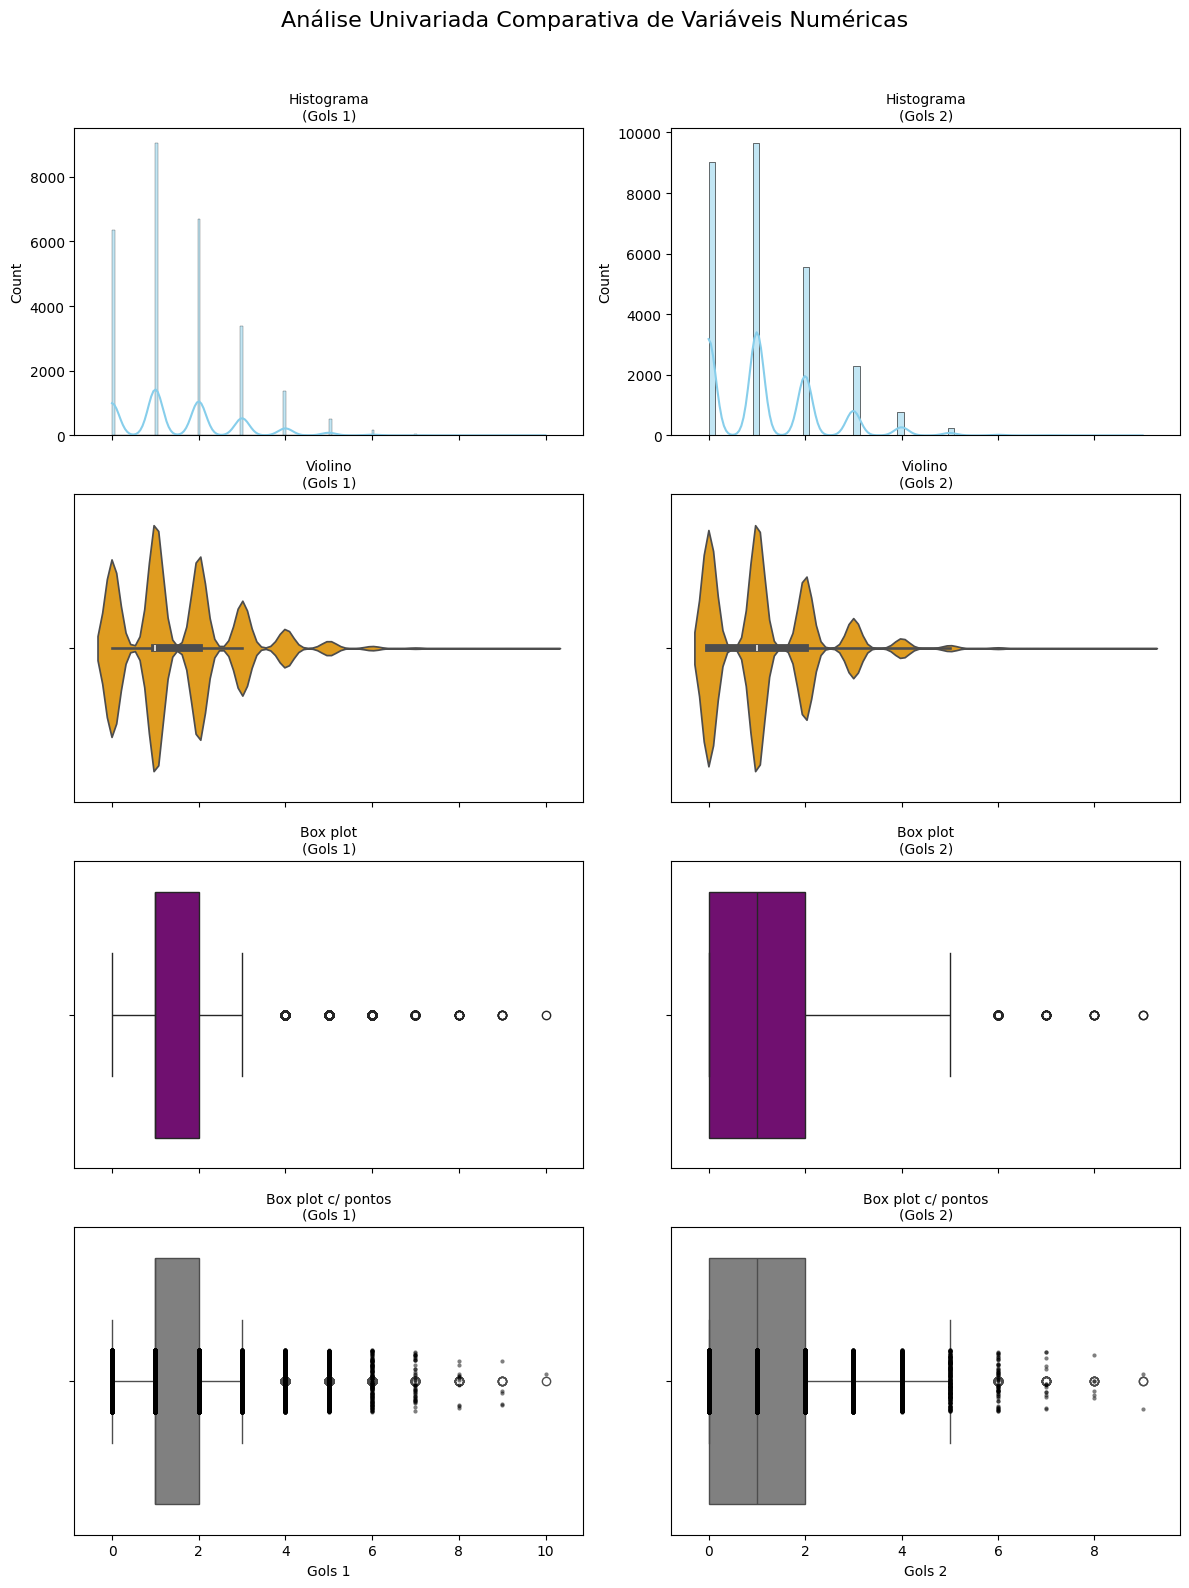


--- Análise Univariada para Variáveis Numéricas Concluída ---


In [110]:
univariada_variavel_numerica(games, ['Gols 1', 'Gols 2'])

- A distribuição de gols é assimétrica a direita
- É possível perceber que times da casa possuem menos partidas com 0 gols, e com uma média de 1.52, mas uma mediana de 1.29, revelando que há um número significativo de partidas com 2 gols além de partidas com 1 gol
- Já para times visitantes, claramente a tendência é de 1 gol por partida, e no Q1 não há gols.
- Porém, Q3 é 2 para ambas as colunas, revelando que a maioria das partidas terão até 2 gols por time.
- Porém, enquanto times da casa apresentam outliers acima de 3 gols, times visitantes apresentam outliers apenas a partir de 5 gols.

--- Análise Univariada para Variáveis Numéricas ---

Tabela de Estatísticas Descritivas:


,count,mean,std,min,25%,50%,75%,max
Chutes a gol 1,26116.0,4.7737,2.7423,0.0,3.0,4.0,6.0,23.0
Chutes a gol 2,26116.0,3.8584,2.3896,0.0,2.0,4.0,5.0,22.0



--- Gerando gráficos lado a lado ---


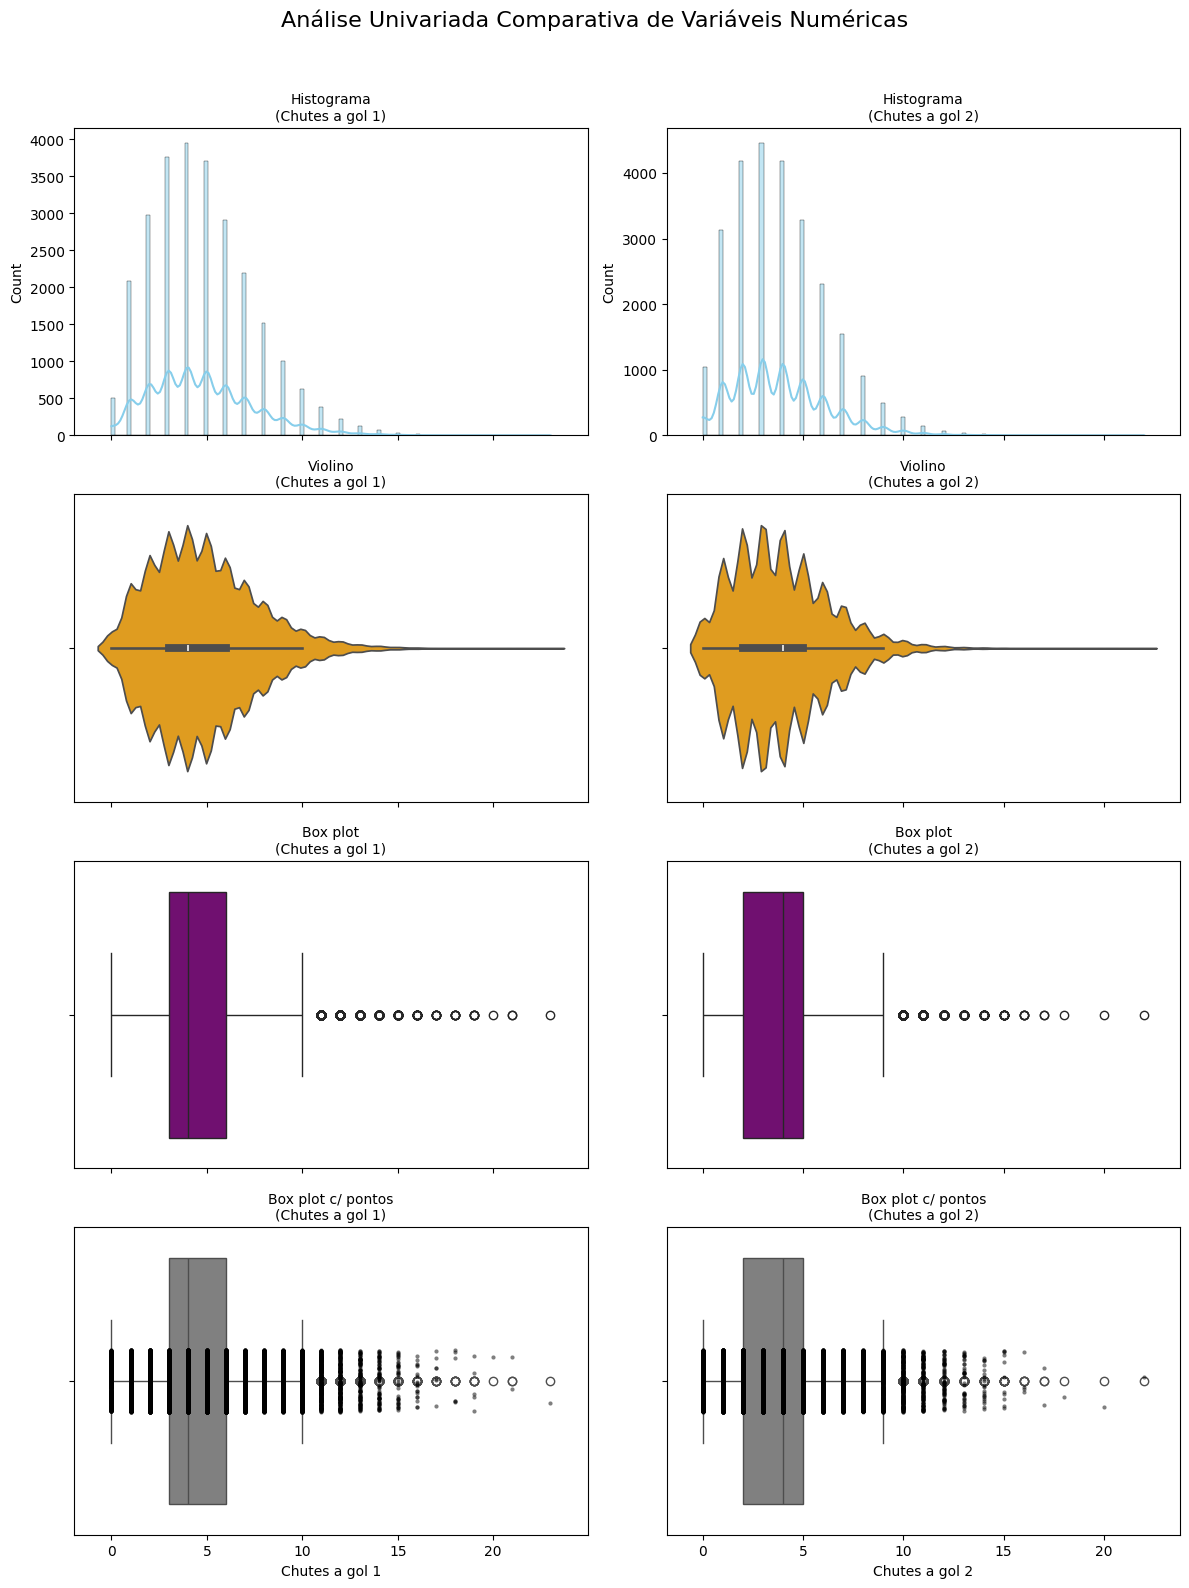


--- Análise Univariada para Variáveis Numéricas Concluída ---


In [111]:
univariada_variavel_numerica(games, ['Chutes a gol 1', 'Chutes a gol 2'])

- A distribuição de chutes a gol é assimétrica para a direita
- A média de chutes a gol por partida é de 4 para as duas colunas, mas claramente há uma tendência maior de chutes a gol pelos times da casa
- Para 50% dos dados, há 4 chutes a gol por partida
- Aqui também se observa uma distribuição mais concentrada para times da casa, enquanto times visitantes possuem mais outliers

--- Análise Univariada para Variáveis Numéricas ---

Tabela de Estatísticas Descritivas:


,count,mean,std,min,25%,50%,75%,max
Chutes fora 1,25307.0,6.0450,3.2178,0.0,4.0,6.0,8.0,23.0
Chutes fora 2,25307.0,4.9358,2.8175,0.0,3.0,5.0,7.0,21.0



--- Gerando gráficos lado a lado ---


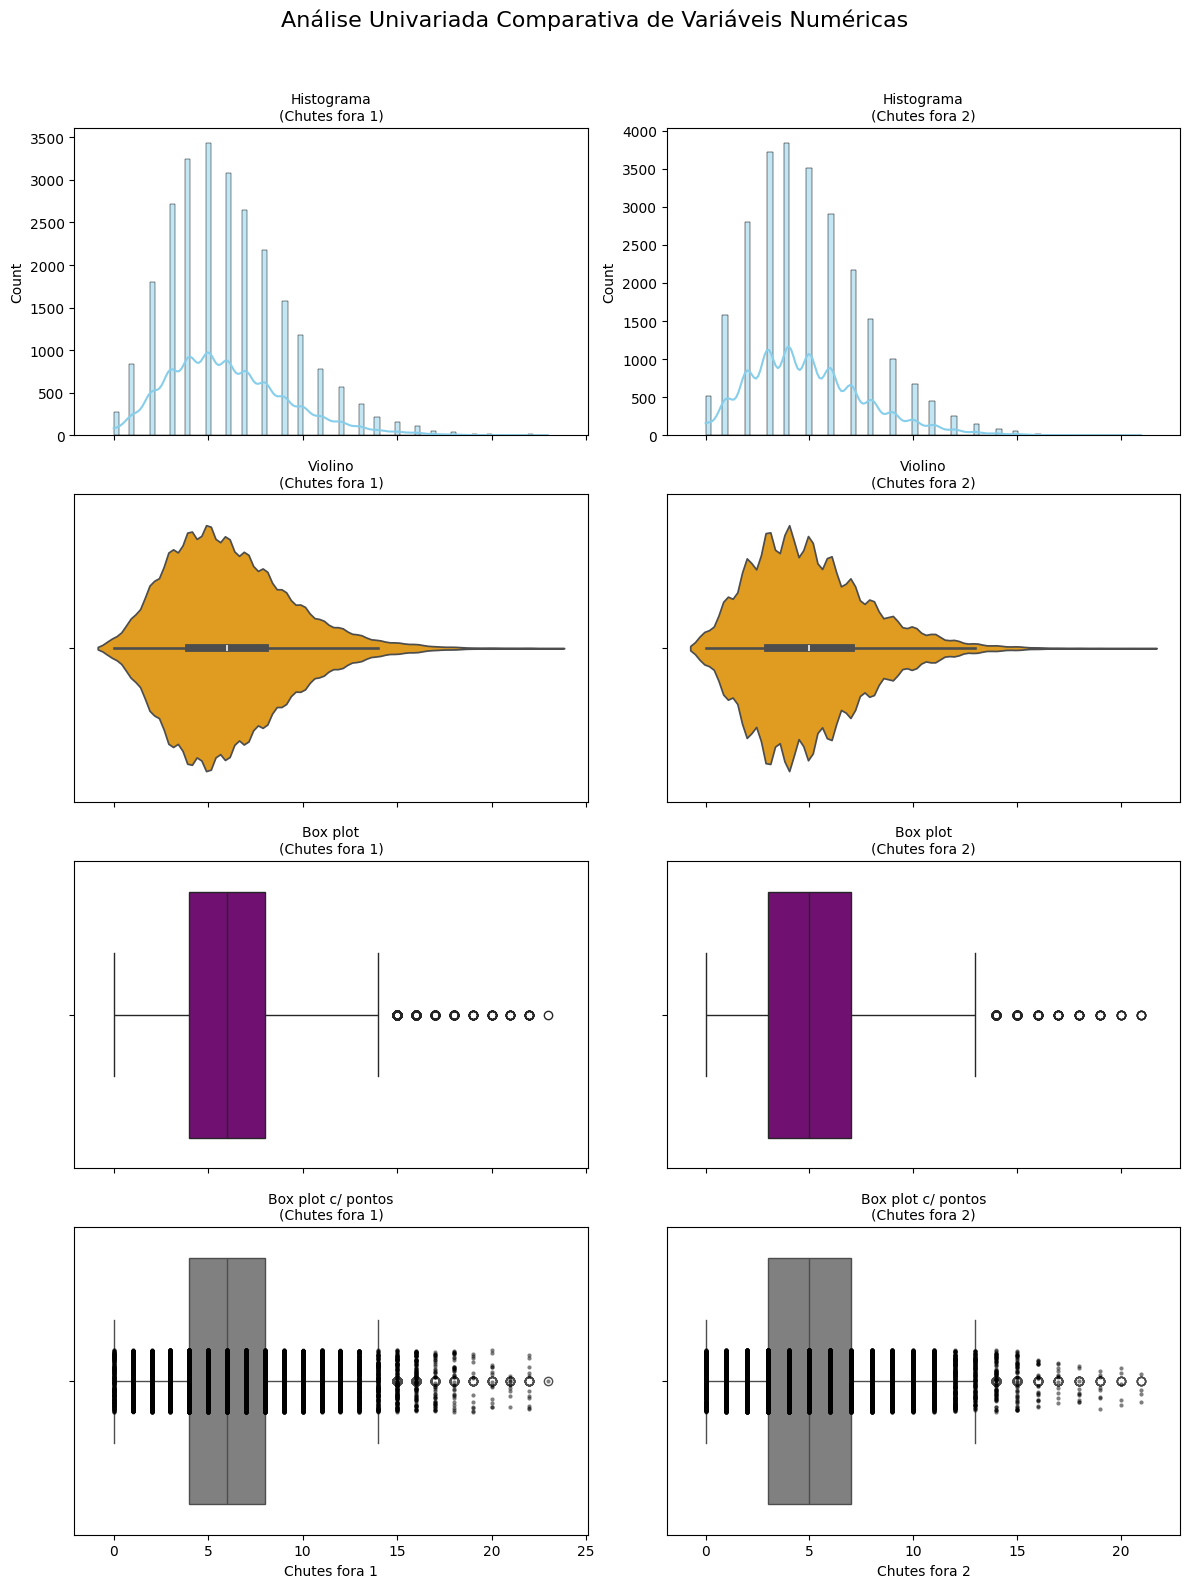


--- Análise Univariada para Variáveis Numéricas Concluída ---


In [112]:
univariada_variavel_numerica(games, ['Chutes fora 1', 'Chutes fora 2'])

- A distribuição dos dados é assimétrica a direita, mas o valor de 748 chutes para fora não faz o menor sentido, então removemos esta linha.
- A média de chutes para fora é de 6 para o time da casa e 5 para o visitante, com o valor mais frequente sendo 5 para o time da casa e 4 para o visitante.
- Aqui podemos assumir uma leve tendência de tentativas a mais para o time da casa que o time visitante, com pouca diferença entre os dados.

--- Análise Univariada para Variáveis Numéricas ---

Tabela de Estatísticas Descritivas:


,count,mean,std,min,25%,50%,75%,max
Chutes bloqueados 1,8825.0,2.4416,1.8927,0.0,1.0,2.0,3.0,15.0
Chutes bloqueados 2,8825.0,1.9331,1.6448,0.0,1.0,2.0,3.0,12.0



--- Gerando gráficos lado a lado ---


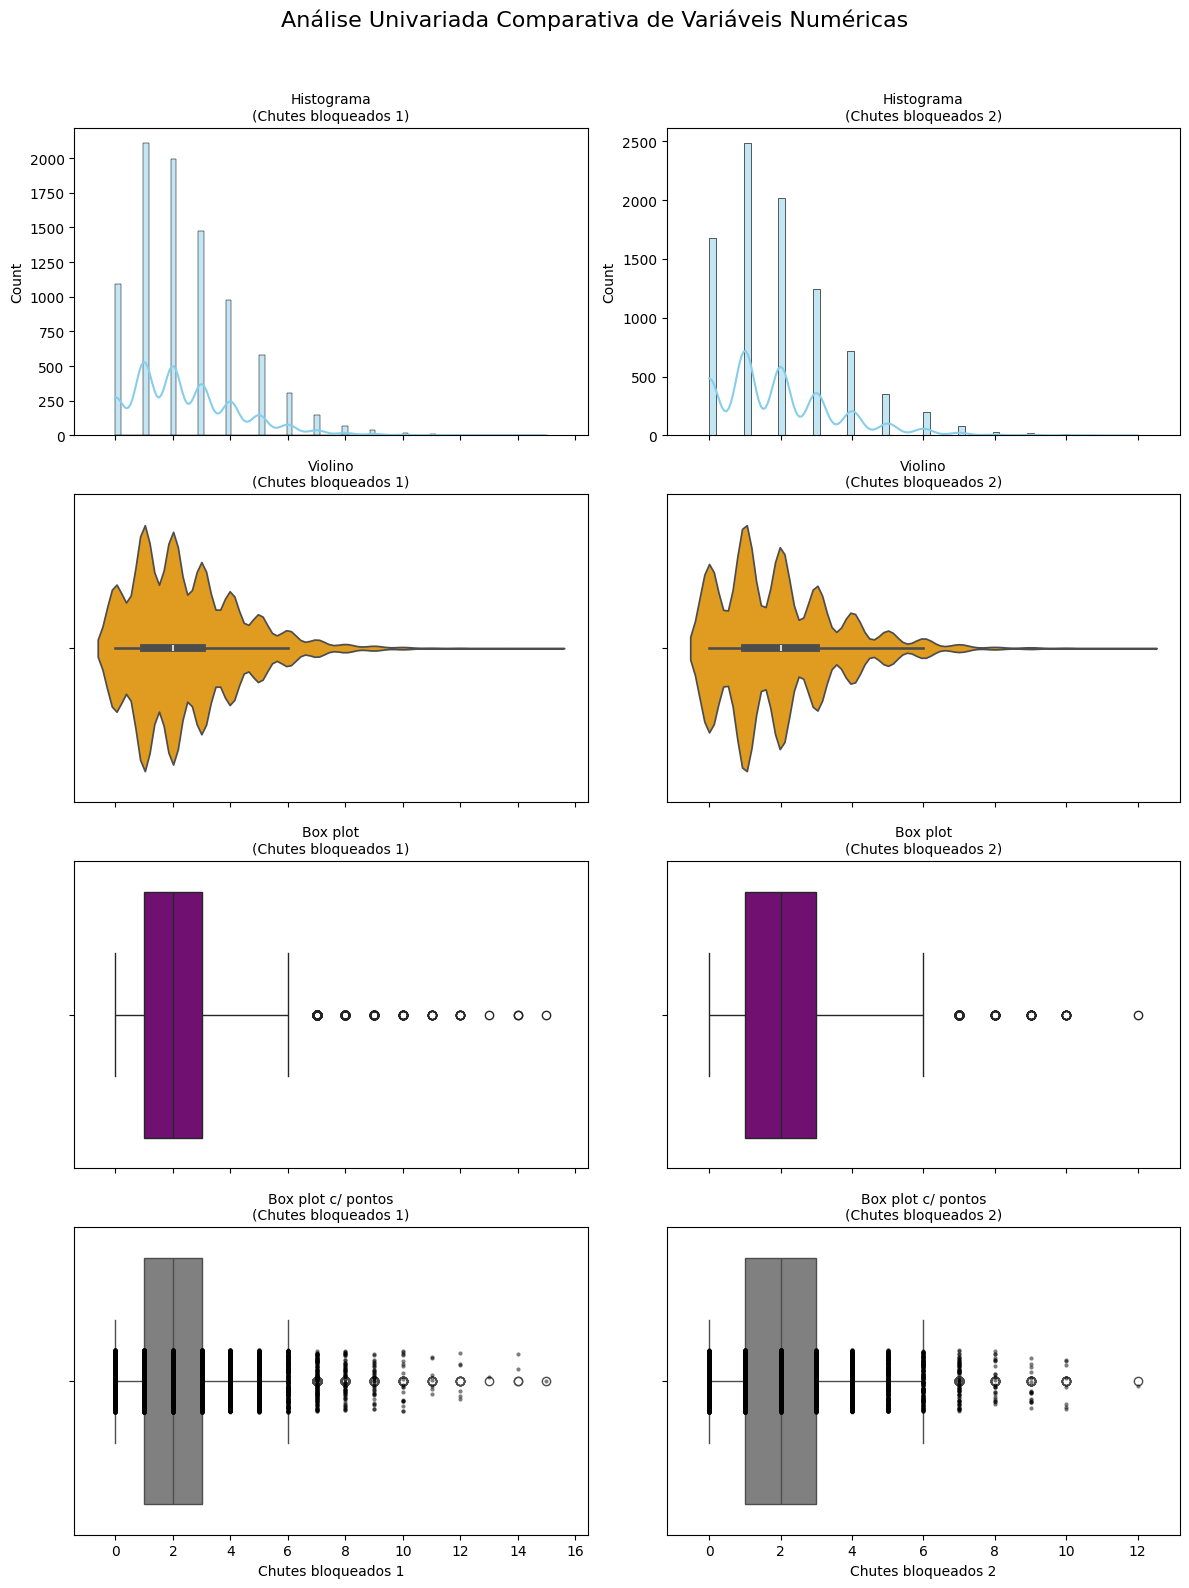


--- Análise Univariada para Variáveis Numéricas Concluída ---


In [113]:
univariada_variavel_numerica(games, ['Chutes bloqueados 1', 'Chutes bloqueados 2'])

- Aqui já podemos ver que o comportamento é muito similar, com a média levemente maior para os times da casa por conta dos outliers, mas a mediana é muito próxima, e os valores do IQR também.
- Q2 exibe 2 chutes bloqueados por partida, com uma tendência levemente maior do número de bloqueios por parte dos times da casa

--- Análise Univariada para Variáveis Numéricas ---

Tabela de Estatísticas Descritivas:


,count,mean,std,min,25%,50%,75%,max
Tiro de meta 1,11996.0,7.0685,3.1828,0.0,5.0,7.0,9.0,23.0
Tiro de meta 2,11996.0,8.3795,3.5211,0.0,6.0,8.0,11.0,27.0



--- Gerando gráficos lado a lado ---


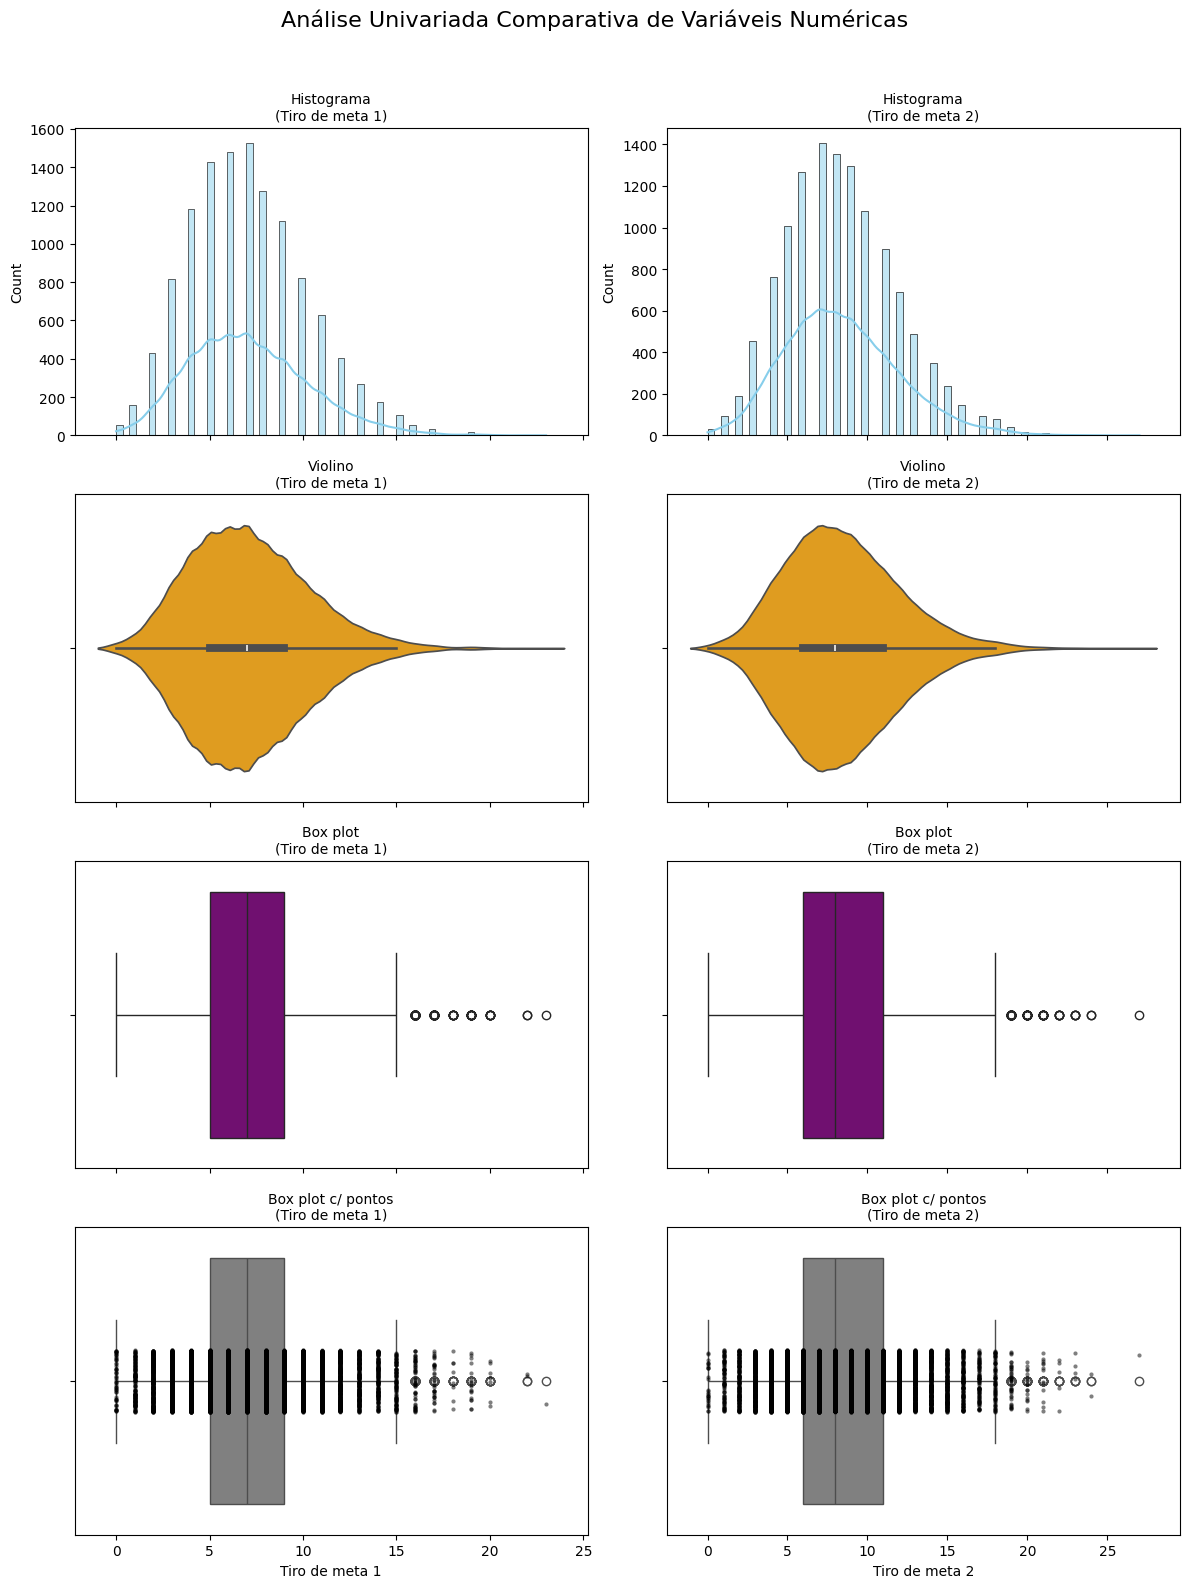


--- Análise Univariada para Variáveis Numéricas Concluída ---


In [114]:
univariada_variavel_numerica(games, ['Tiro de meta 1', 'Tiro de meta 2'])

- Já para os tiros de meta podemos ver uma distribuição assimétrica a direita e claramente uma tendência maior dos times visitantes de cobrarem mais tiros de meta, o que está de acordo com a tendência de maior tentativa e número de gols por parte dos times da casa, como foi visto nas análises anteriores.
- Há uma média de 7 tiros de meta para o time da casa e 8 para o time visitante, com uma mediana de 3 para ambos.
- Podemos ver que nem todos os tiros de meta são resultantes de chutes para fora, o que podem ser chutes de muito longe, chutes bloqueados pelo próprio time, disputas na linha de fundo, pênaltis perdidos, etc.

--- Análise Univariada para Variáveis Numéricas ---

Tabela de Estatísticas Descritivas:


,count,mean,std,min,25%,50%,75%,max
Laterais 1,15146.0,15.7525,8.2472,0.0,9.0,16.0,22.0,48.0
Laterais 2,15146.0,15.0813,8.0787,0.0,9.0,15.0,21.0,46.0



--- Gerando gráficos lado a lado ---


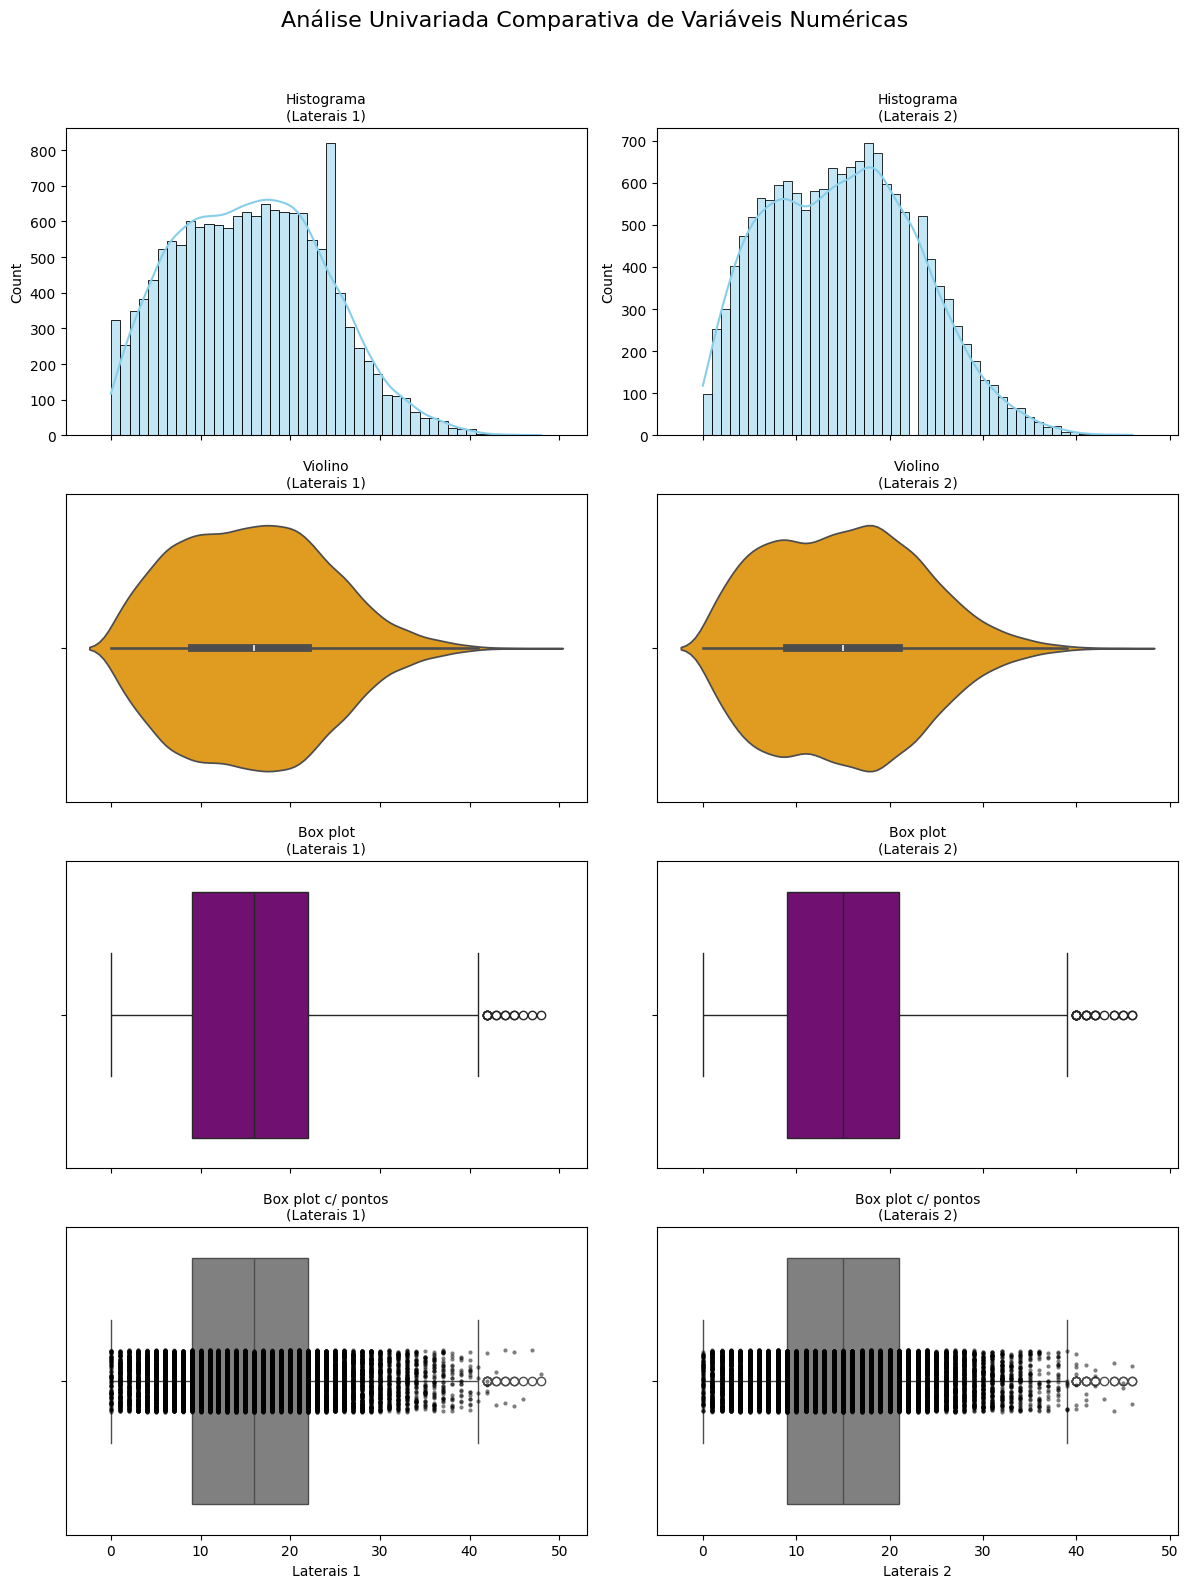


--- Análise Univariada para Variáveis Numéricas Concluída ---


In [115]:
univariada_variavel_numerica(games, ['Laterais 1', 'Laterais 2'])

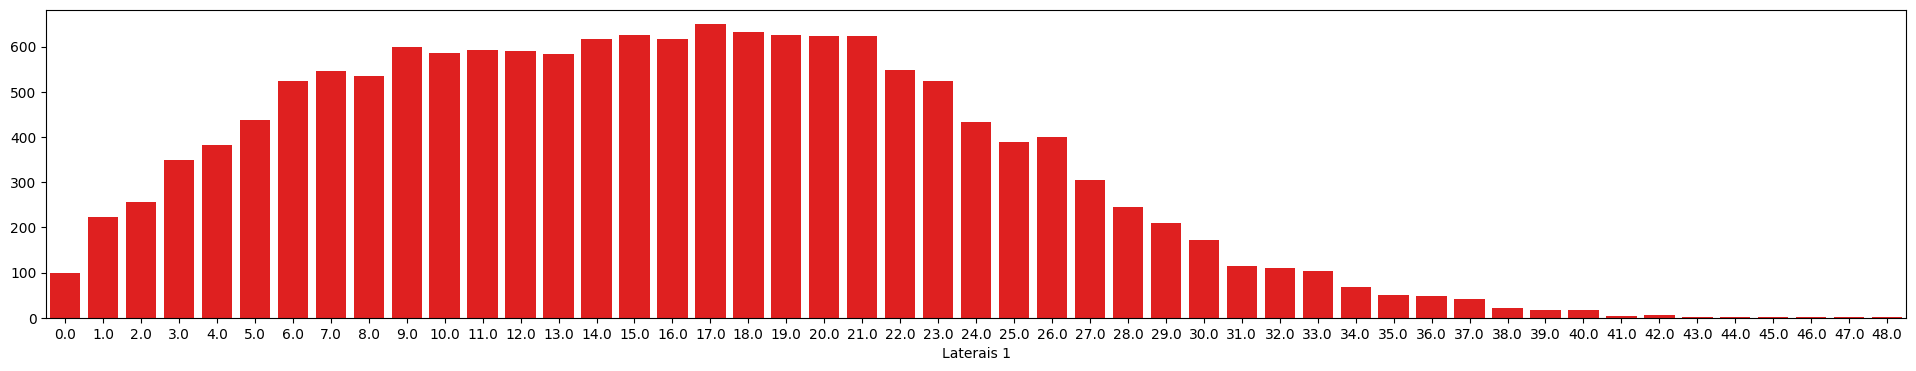

In [116]:
laterais_casa = games['Laterais 1'].value_counts().sort_index()
laterais_fora = games['Laterais 2'].value_counts().sort_index()

plt.figure(figsize=(24, 4))
sns.barplot(x=laterais_casa.index, y=laterais_casa.values, color='red')
plt.show()


# sns.barplot(x=laterais_fora.index, y=laterais_fora.values, color='red')

- É possível ver que houve um erro de plotagem no gráfico do histograma para as laterais
- Os números de laterais são levemente maiores para os times da casa, mas não há uma diferença tão explícita
- Faz sentido contando a marcação dos times visitantes e a tendência do time da casa de ter um ataque mais forte
- Provavelmente vai aparecer com os dados de faltas

--- Análise Univariada para Variáveis Numéricas ---

Tabela de Estatísticas Descritivas:


,count,mean,std,min,25%,50%,75%,max
Faltas 1,25309.0,12.7124,4.3075,0.0,10.0,12.0,15.0,34.0
Faltas 2,25309.0,12.9524,4.3846,0.0,10.0,13.0,16.0,35.0



--- Gerando gráficos lado a lado ---


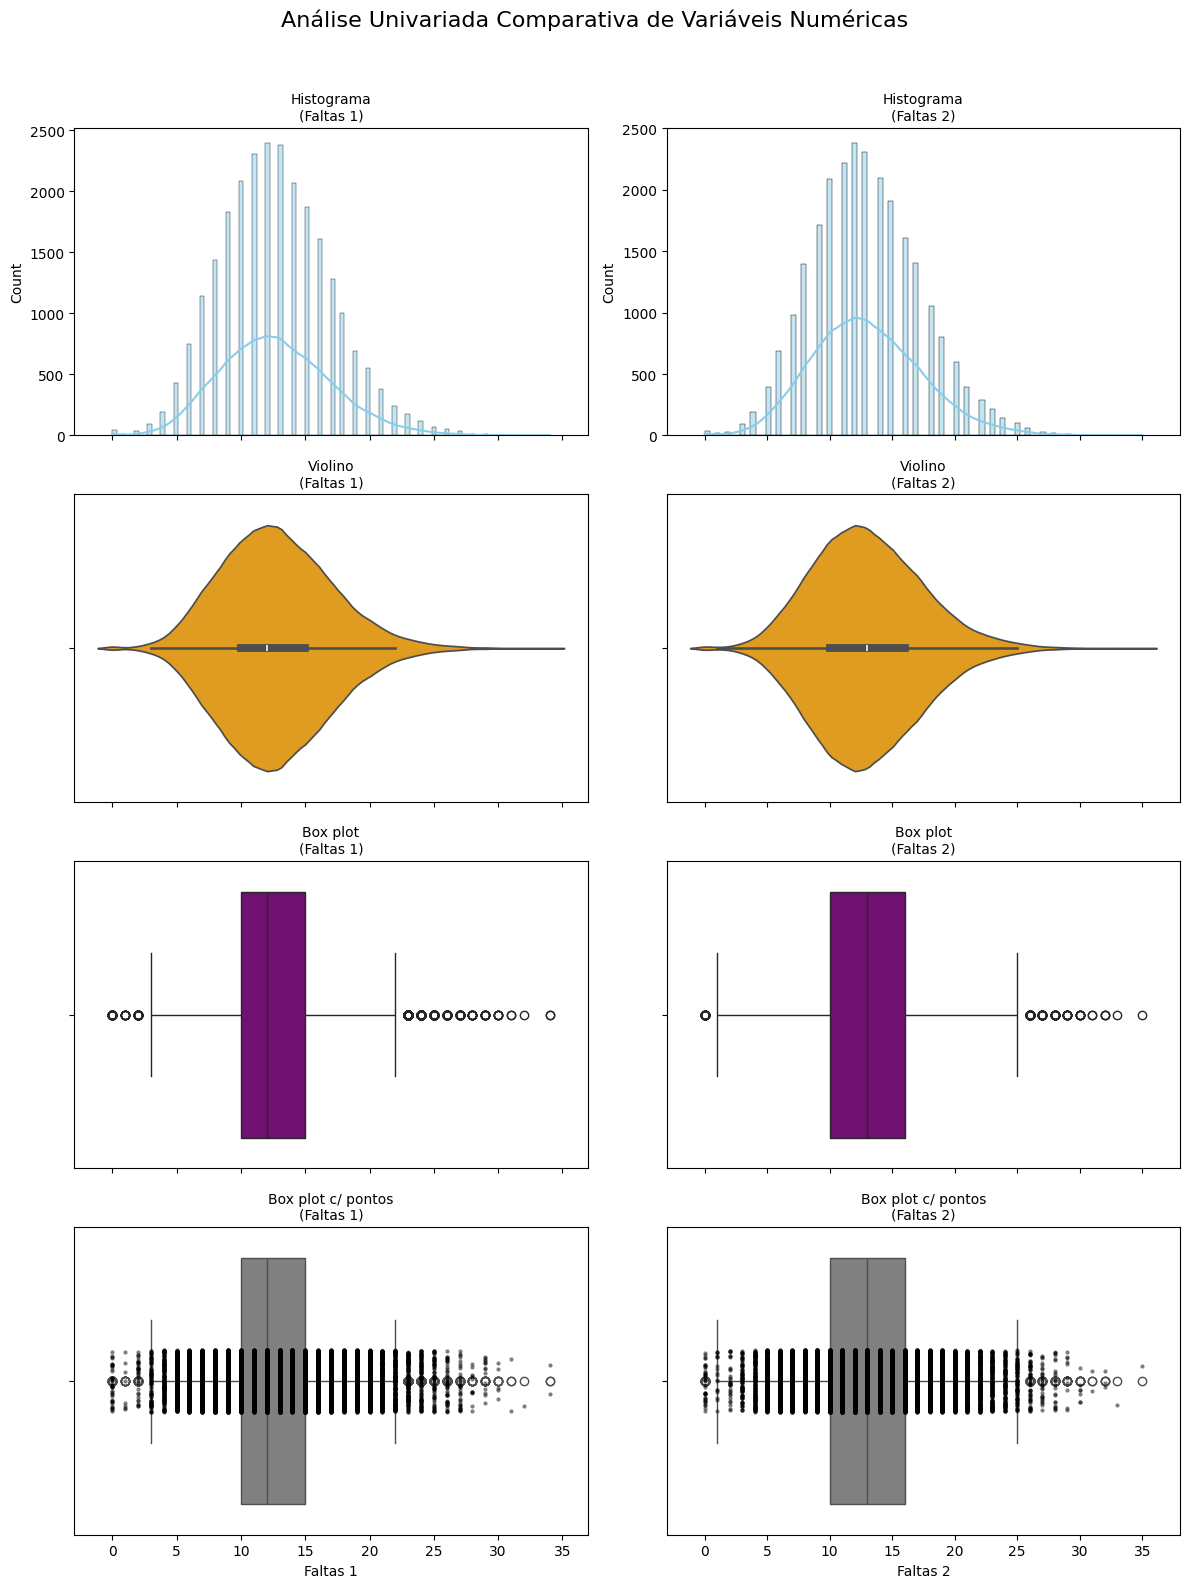


--- Análise Univariada para Variáveis Numéricas Concluída ---


In [117]:
univariada_variavel_numerica(games, ['Faltas 1', 'Faltas 2'])

- Removemos alguns outliers para ambas as colunas
- Na verdade, a média e mediana não é muito diferente para os times da casa e visitantes, com um IQR bem próximo para todas as faixas
- Então dá pra concluir que as laterais não tem muita relação com faltas, e pode estar mais relacionado com outros dados que indiquem defesa
- Todos os times cometem faltas no jogo, podendo ver que há outliers até 3/4 faltas e após 25/26 faltas
- Em média, ambos os times marcam uma quantidade similar de faltas.

--- Análise Univariada para Variáveis Numéricas ---

Tabela de Estatísticas Descritivas:


,count,mean,std,min,25%,50%,75%,max
Tiros-livres 1,6243.0,14.1557,4.4333,1.0,11.0,14.0,17.0,36.0
Tiros-livres 2,6243.0,14.2425,4.3309,0.0,11.0,14.0,17.0,33.0



--- Gerando gráficos lado a lado ---


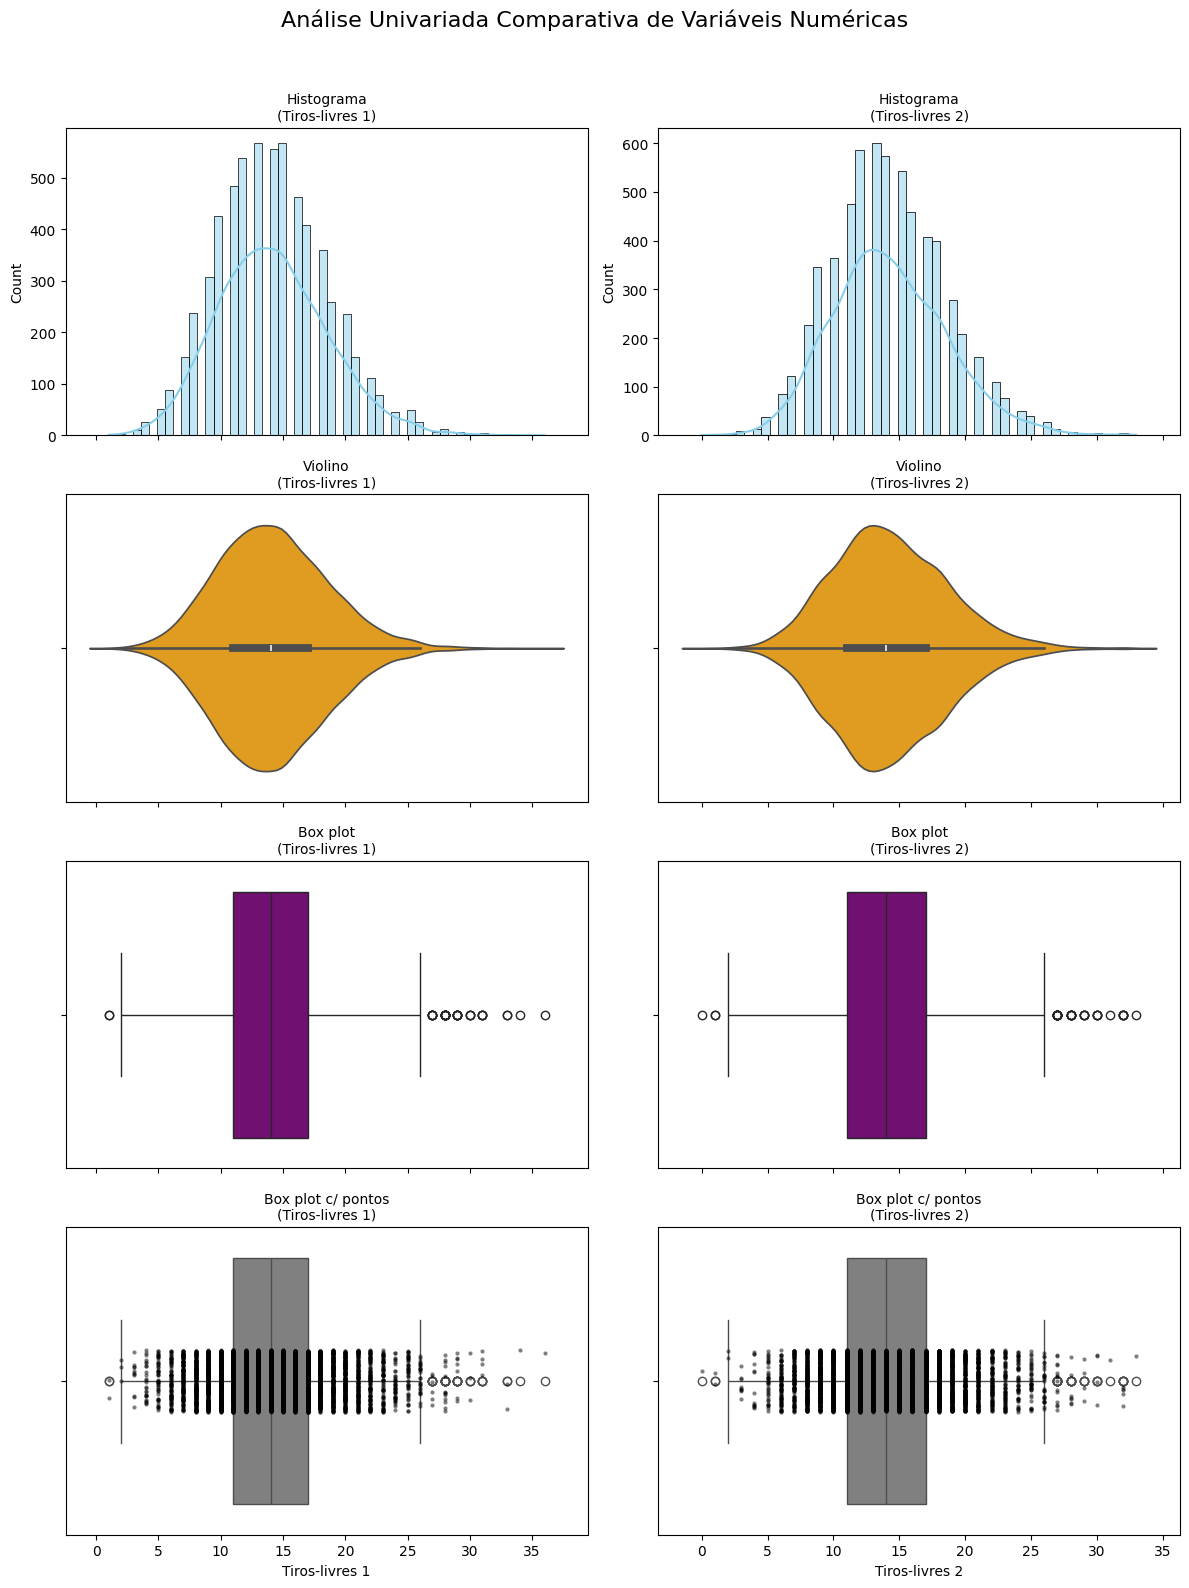


--- Análise Univariada para Variáveis Numéricas Concluída ---


In [118]:
univariada_variavel_numerica(games, ['Tiros-livres 1', 'Tiros-livres 2'])

--- Análise Univariada para Variáveis Numéricas ---

Tabela de Estatísticas Descritivas:


,count,mean,std,min,25%,50%,75%,max
Impedimentos 1,24856.0,2.1401,1.7430,0.0,1.0,2.0,3.0,12.0
Impedimentos 2,24856.0,1.9690,1.6721,0.0,1.0,2.0,3.0,12.0



--- Gerando gráficos lado a lado ---


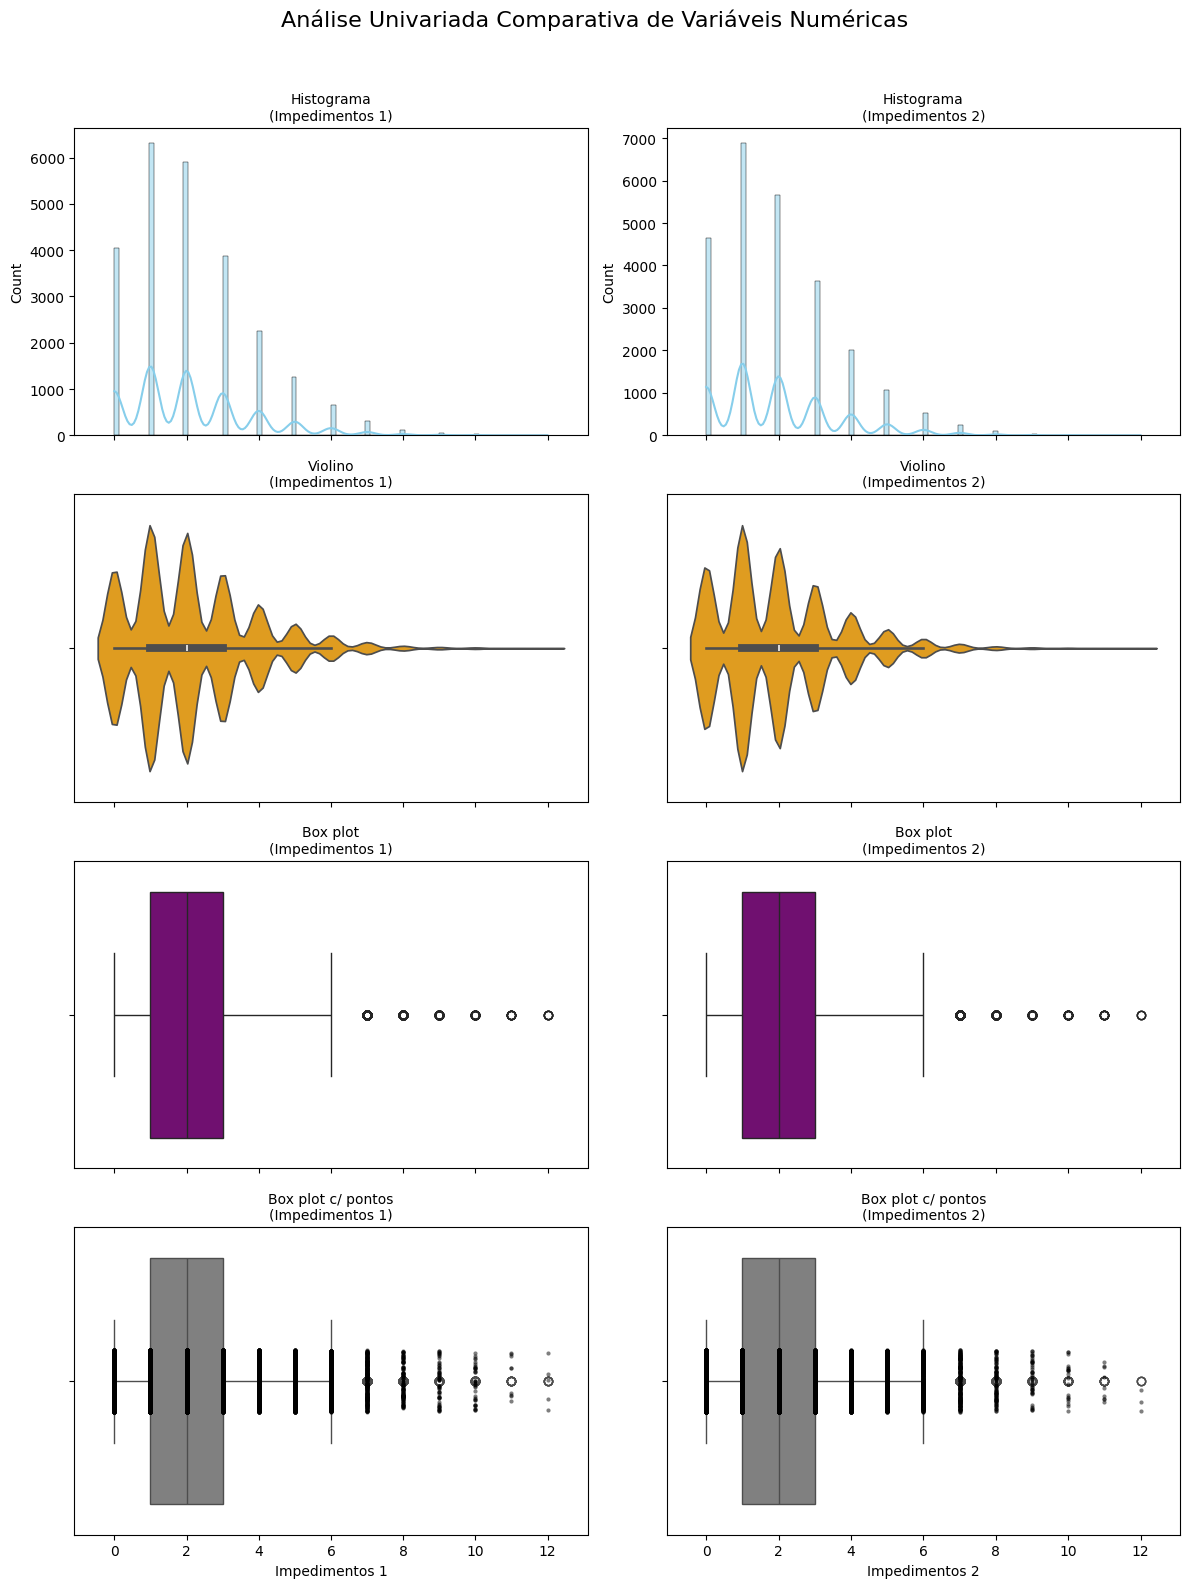


--- Análise Univariada para Variáveis Numéricas Concluída ---


In [119]:
univariada_variavel_numerica(games, ['Impedimentos 1', 'Impedimentos 2'])

In [120]:
impedimentos_1_count = games['Impedimentos 1'].value_counts().sort_index()

# Calculate the percentage of value counts for the column 'Impedimentos 1'
impedimentos_1_percentage = (impedimentos_1_count / impedimentos_1_count.sum()) * 100

# Create a DataFrame to display the counts and percentages
impedimentos_1_table = pd.DataFrame({
    'Count': impedimentos_1_count.values,
    'Percentage (%)': impedimentos_1_percentage.values
}, index=impedimentos_1_count.index).sort_values(by='Count', ascending=False)
    
# Display the table
impedimentos_1_table

,Count,Percentage (%)
Impedimentos 1,,
1.0,6321,25.430480
2.0,5911,23.780978
0.0,4051,16.297876
3.0,3868,15.561635
4.0,2246,9.036048
5.0,1252,5.037013
6.0,663,2.667364
7.0,310,1.247184
8.0,122,0.490827


In [121]:
impedimentos_2_count = games['Impedimentos 2'].value_counts().sort_index()

# Calculate the percentage of value counts for the column 'Impedimentos 1'
impedimentos_2_percentage = (impedimentos_2_count / impedimentos_2_count.sum()) * 100

# Create a DataFrame to display the counts and percentages
impedimentos_2_table = pd.DataFrame({
    'Count': impedimentos_2_count.values,
    'Percentage (%)': impedimentos_2_percentage.values
}, index=impedimentos_2_count.index).sort_values(by='Count', ascending=False)
    
# Display the table
impedimentos_2_table

,Count,Percentage (%)
Impedimentos 2,,
1.0,6891,27.723688
2.0,5650,22.730930
0.0,4641,18.671548
3.0,3645,14.664467
4.0,2011,8.090602
5.0,1064,4.280657
6.0,531,2.136305
7.0,244,0.981654
8.0,102,0.410364


- Aqui, novamente, outliers com valores acima de 12 não fazem sentido, e foram removidos
- As médias são praticamente as mesmas, com IQR igual para ambos times da casa e visitantes
- Apenas é possível ver uma leve tendência para os times da casa, o que faz sentido com a hipótese de maior performance por parte dos times da casa num geral

--- Análise Univariada para Variáveis Numéricas ---

Tabela de Estatísticas Descritivas:


,count,mean,std,min,25%,50%,75%,max
Cruzamentos 1,8994.0,17.7080,7.9929,0.0,12.0,17.0,22.0,66.0
Cruzamentos 2,8994.0,14.2651,7.0638,0.0,9.0,13.0,18.0,63.0



--- Gerando gráficos lado a lado ---


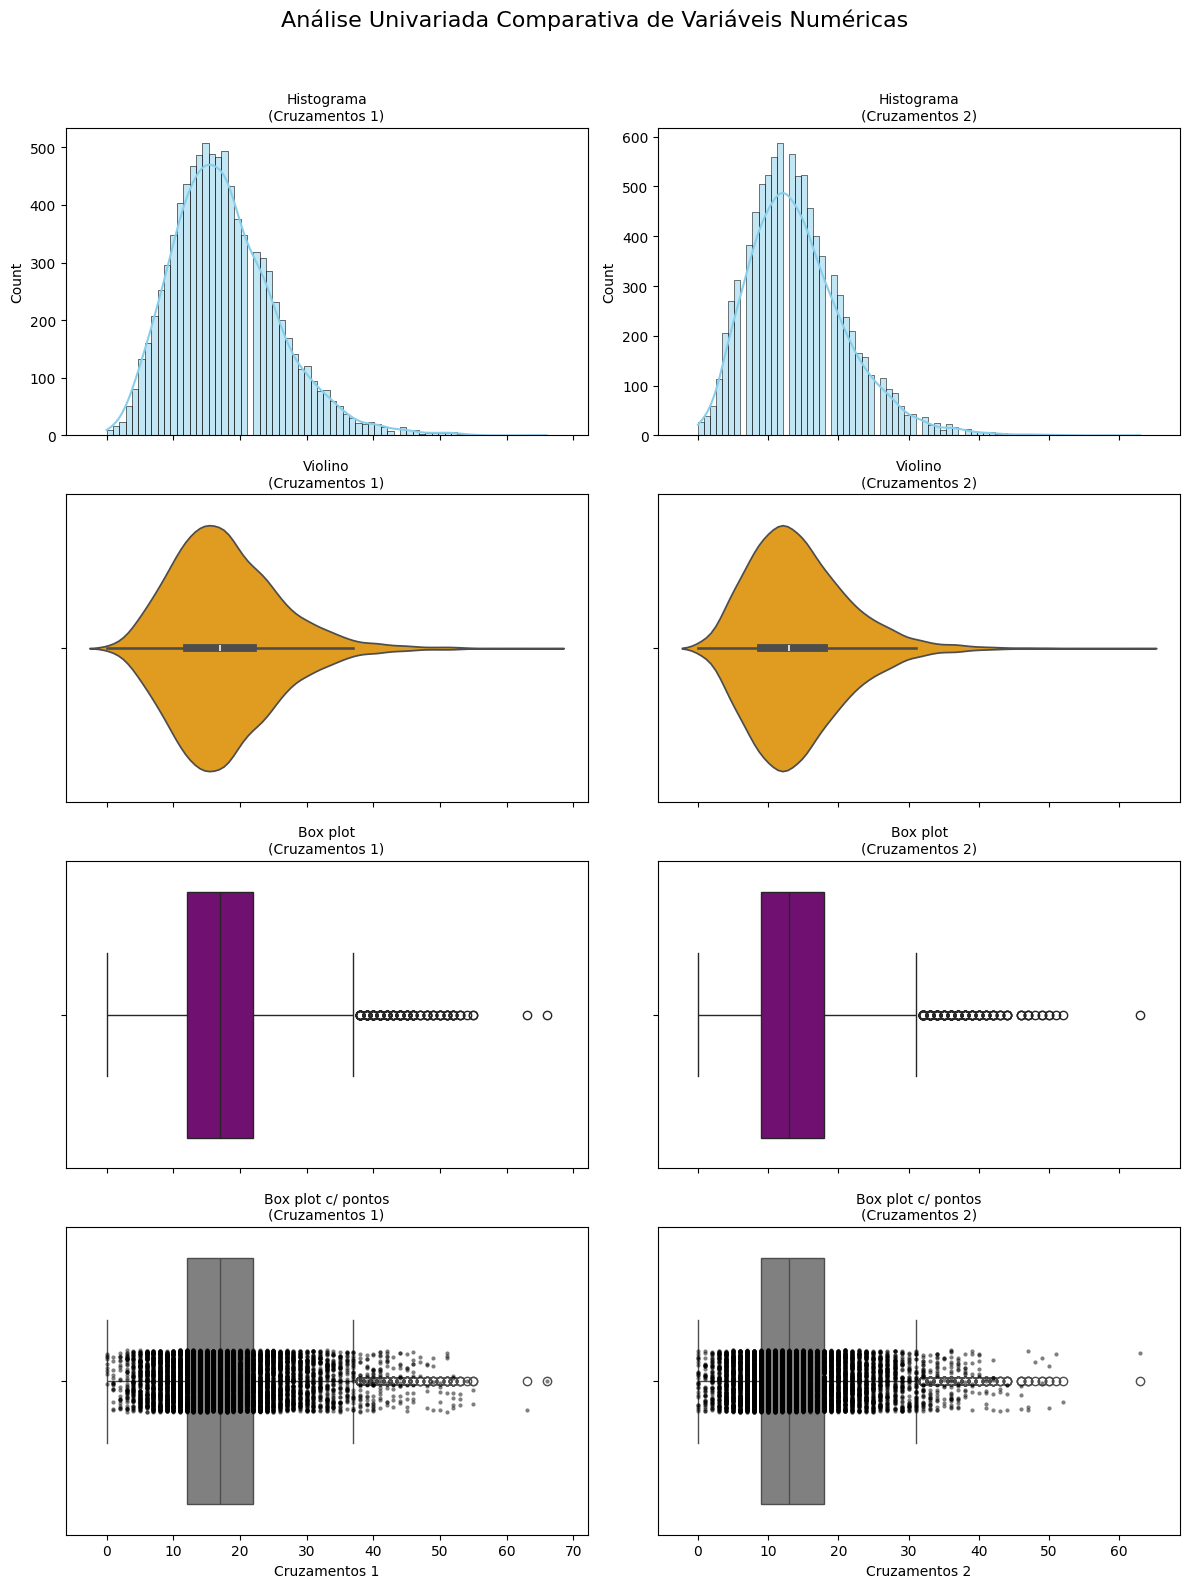


--- Análise Univariada para Variáveis Numéricas Concluída ---


In [122]:
univariada_variavel_numerica(games, ['Cruzamentos 1', 'Cruzamentos 2'])

--- Análise Univariada para Variáveis Numéricas ---

Tabela de Estatísticas Descritivas:


,count,mean,std,min,25%,50%,75%,max
Defesas difíceis 1,6193.0,2.6767,1.8431,0.0,1.0,2.0,4.0,11.0
Defesas difíceis 2,6193.0,3.2068,2.0788,0.0,2.0,3.0,4.0,17.0



--- Gerando gráficos lado a lado ---


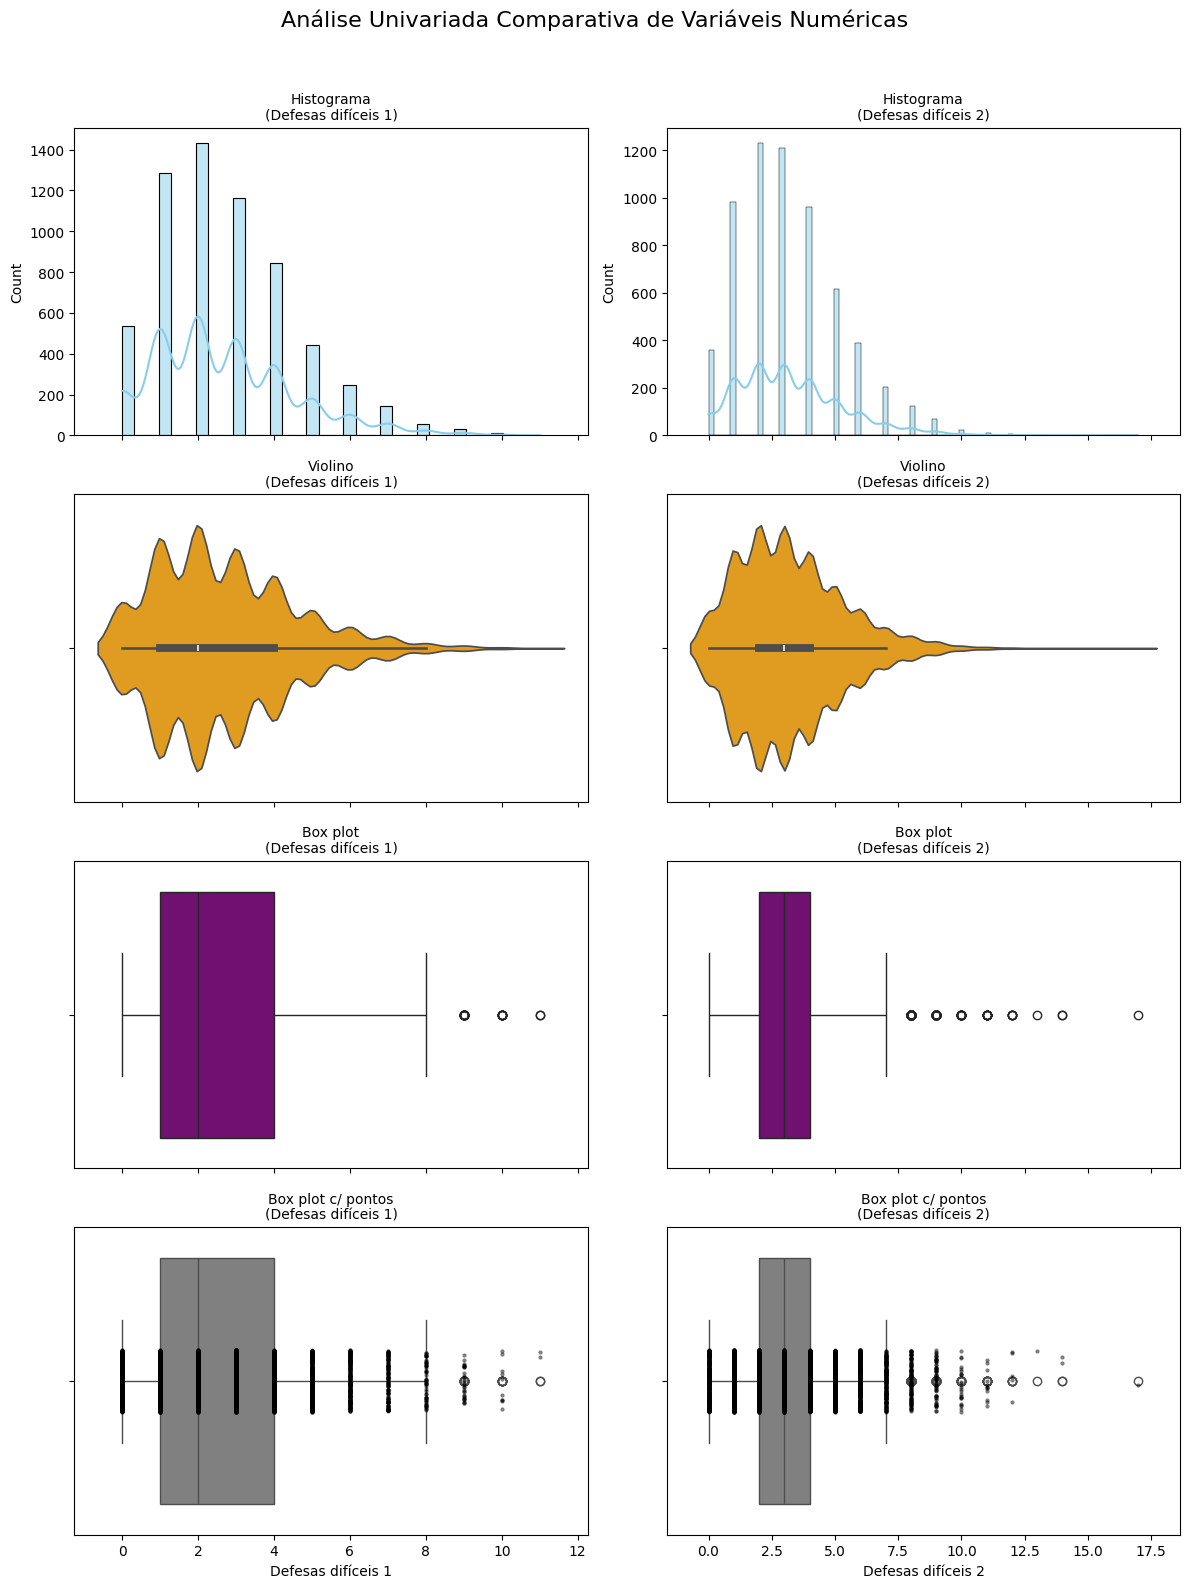


--- Análise Univariada para Variáveis Numéricas Concluída ---


In [123]:
univariada_variavel_numerica(games, ['Defesas difíceis 1', 'Defesas difíceis 2'])

Aviso: A variável 'Cartões amarelos 1' pode não ser categórica (object, category ou bool). Tentando analisar mesmo assim.
Aviso: A variável 'Cartões amarelos 2' pode não ser categórica (object, category ou bool). Tentando analisar mesmo assim.
--- Análise Univariada para Variáveis Categóricas ---

--- Análise de Tabela para Variável Categórica: Cartões amarelos 1 (1/2) ---
Describe da variável categórica: Cartões amarelos 1


C:\Users\carlo\AppData\Local\Temp\ipykernel_10232\896419393.py:174: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not (ptypes.is_object_dtype(dado[var]) or ptypes.is_categorical_dtype(dado[var]) or ptypes.is_bool_dtype(dado[var])):


,count,mean,std,min,25%,50%,75%,max
Cartões amarelos 1,27620.0,1.862382,1.355063,0.0,1.0,2.0,3.0,11.0


Tabela de frequência da variável categórica (com percentuais e total): Cartões amarelos 1


,Cartões amarelos 1,Frequência,Percentual (%)
0,1.0,7601,27.52
1,2.0,7527,27.25
2,3.0,4755,17.22
3,0.0,4459,16.14
4,4.0,2217,8.03
5,5.0,792,2.87
6,6.0,211,0.76
7,7.0,43,0.16
8,8.0,13,0.05
9,11.0,1,0.00



--- Análise de Tabela para Variável Categórica: Cartões amarelos 2 (2/2) ---
Describe da variável categórica: Cartões amarelos 2


,count,mean,std,min,25%,50%,75%,max
Cartões amarelos 2,27620.0,2.122085,1.412553,0.0,1.0,2.0,3.0,10.0


Tabela de frequência da variável categórica (com percentuais e total): Cartões amarelos 2


,Cartões amarelos 2,Frequência,Percentual (%)
0,2.0,7547,27.32
1,1.0,6659,24.11
2,3.0,5708,20.67
3,0.0,3310,11.98
4,4.0,2839,10.28
5,5.0,1113,4.03
6,6.0,325,1.18
7,7.0,98,0.35
8,8.0,13,0.05
9,9.0,6,0.02



--- Gerando Gráficos de Frequência Lado a Lado ---


C:\Users\carlo\AppData\Local\Temp\ipykernel_10232\896419393.py:243: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y='Frequência', data=frequency_table_plot, ax=ax, errorbar=None, palette='viridis')
C:\Users\carlo\AppData\Local\Temp\ipykernel_10232\896419393.py:243: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y='Frequência', data=frequency_table_plot, ax=ax, errorbar=None, palette='viridis')


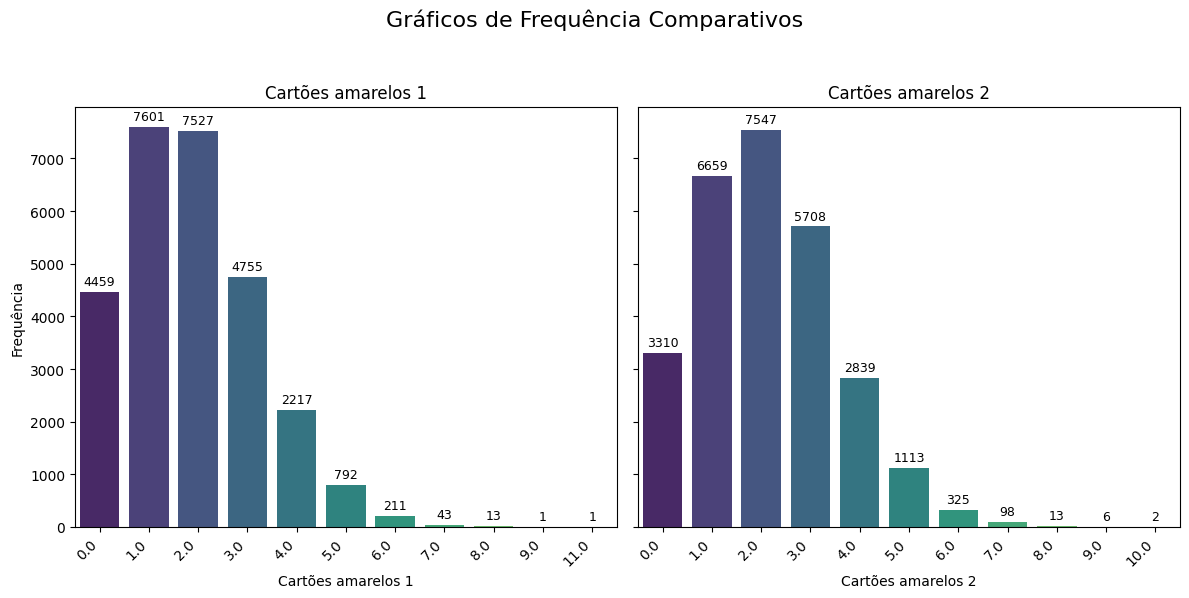


--- Análise Univariada para Variáveis Categóricas Concluída ---


In [124]:
univariada_variavel_categoria(games, ['Cartões amarelos 1', 'Cartões amarelos 2'])

Aviso: A variável 'Cartões vermelhos 1' pode não ser categórica (object, category ou bool). Tentando analisar mesmo assim.
Aviso: A variável 'Cartões vermelhos 2' pode não ser categórica (object, category ou bool). Tentando analisar mesmo assim.
--- Análise Univariada para Variáveis Categóricas ---

--- Análise de Tabela para Variável Categórica: Cartões vermelhos 1 (1/2) ---
Describe da variável categórica: Cartões vermelhos 1


C:\Users\carlo\AppData\Local\Temp\ipykernel_10232\896419393.py:174: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not (ptypes.is_object_dtype(dado[var]) or ptypes.is_categorical_dtype(dado[var]) or ptypes.is_bool_dtype(dado[var])):


,count,mean,std,min,25%,50%,75%,max
Cartões vermelhos 1,27620.0,0.04971,0.225525,0.0,0.0,0.0,0.0,3.0


Tabela de frequência da variável categórica (com percentuais e total): Cartões vermelhos 1


,Cartões vermelhos 1,Frequência,Percentual (%)
0,0.0,26296,95.21
1,1.0,1276,4.62
2,2.0,47,0.17
3,3.0,1,0.00
4,Total (incl. NaNs se mostrados),27620,100.00



--- Análise de Tabela para Variável Categórica: Cartões vermelhos 2 (2/2) ---
Describe da variável categórica: Cartões vermelhos 2


,count,mean,std,min,25%,50%,75%,max
Cartões vermelhos 2,27620.0,0.058617,0.247519,0.0,0.0,0.0,0.0,4.0


Tabela de frequência da variável categórica (com percentuais e total): Cartões vermelhos 2


,Cartões vermelhos 2,Frequência,Percentual (%)
0,0.0,26080,94.42
1,1.0,1465,5.30
2,2.0,72,0.26
3,3.0,2,0.01
4,4.0,1,0.00
5,Total (incl. NaNs se mostrados),27620,100.00



--- Gerando Gráficos de Frequência Lado a Lado ---


C:\Users\carlo\AppData\Local\Temp\ipykernel_10232\896419393.py:243: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y='Frequência', data=frequency_table_plot, ax=ax, errorbar=None, palette='viridis')
C:\Users\carlo\AppData\Local\Temp\ipykernel_10232\896419393.py:243: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y='Frequência', data=frequency_table_plot, ax=ax, errorbar=None, palette='viridis')


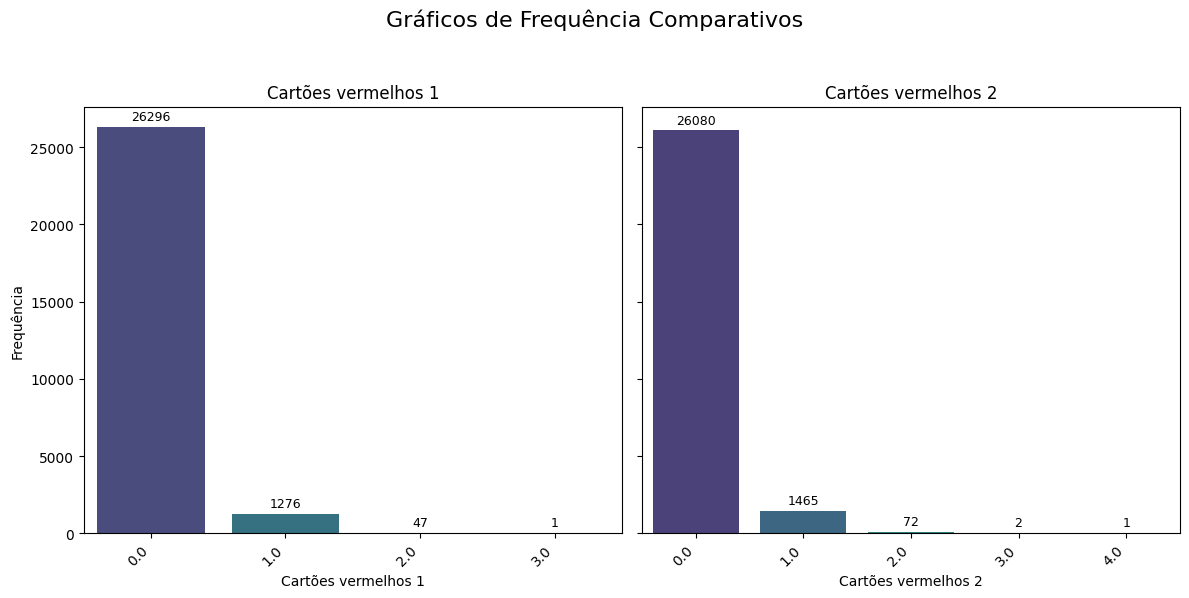


--- Análise Univariada para Variáveis Categóricas Concluída ---


In [125]:
univariada_variavel_categoria(games, ['Cartões vermelhos 1', 'Cartões vermelhos 2'])

- Tem como usar essas variáveis como categóricas? Por exemplo, "houve cartão vermelho" para cartões vermelhos, e "0", "1-2", "3+" para cartões amarelos
- Classificando de forma categórica, mesmo que times visitantes recebam uma maior quantidade de cartões amarelos, o comportamento é similar o suficiente para entendermos estatísticas como "0-1", "2-3", "4+" cartões amarelos, ou "0", "1-2", "3+" cartões amarelos por jogo.
- O que acontece em jogos que possuem mais de 3 cartões amarelos?
- Cartões vermelhos provavelmente podem ser tratados como categóricos, já que é facilmente observável o mesmo padrão para ambos os times, simplificanto a abordagem para "houve cartão vermelho?".
- O que acontece em jogos que possuem 1 cartão vermelho?

--- Análise Univariada para Variáveis Numéricas ---

Tabela de Estatísticas Descritivas:


,count,mean,std,min,25%,50%,75%,max
Escanteios 1,25304.0,5.5582,2.9701,0.0,3.0,5.0,7.0,22.0
Escanteios 2,25304.0,4.4678,2.6166,0.0,3.0,4.0,6.0,21.0



--- Gerando gráficos lado a lado ---


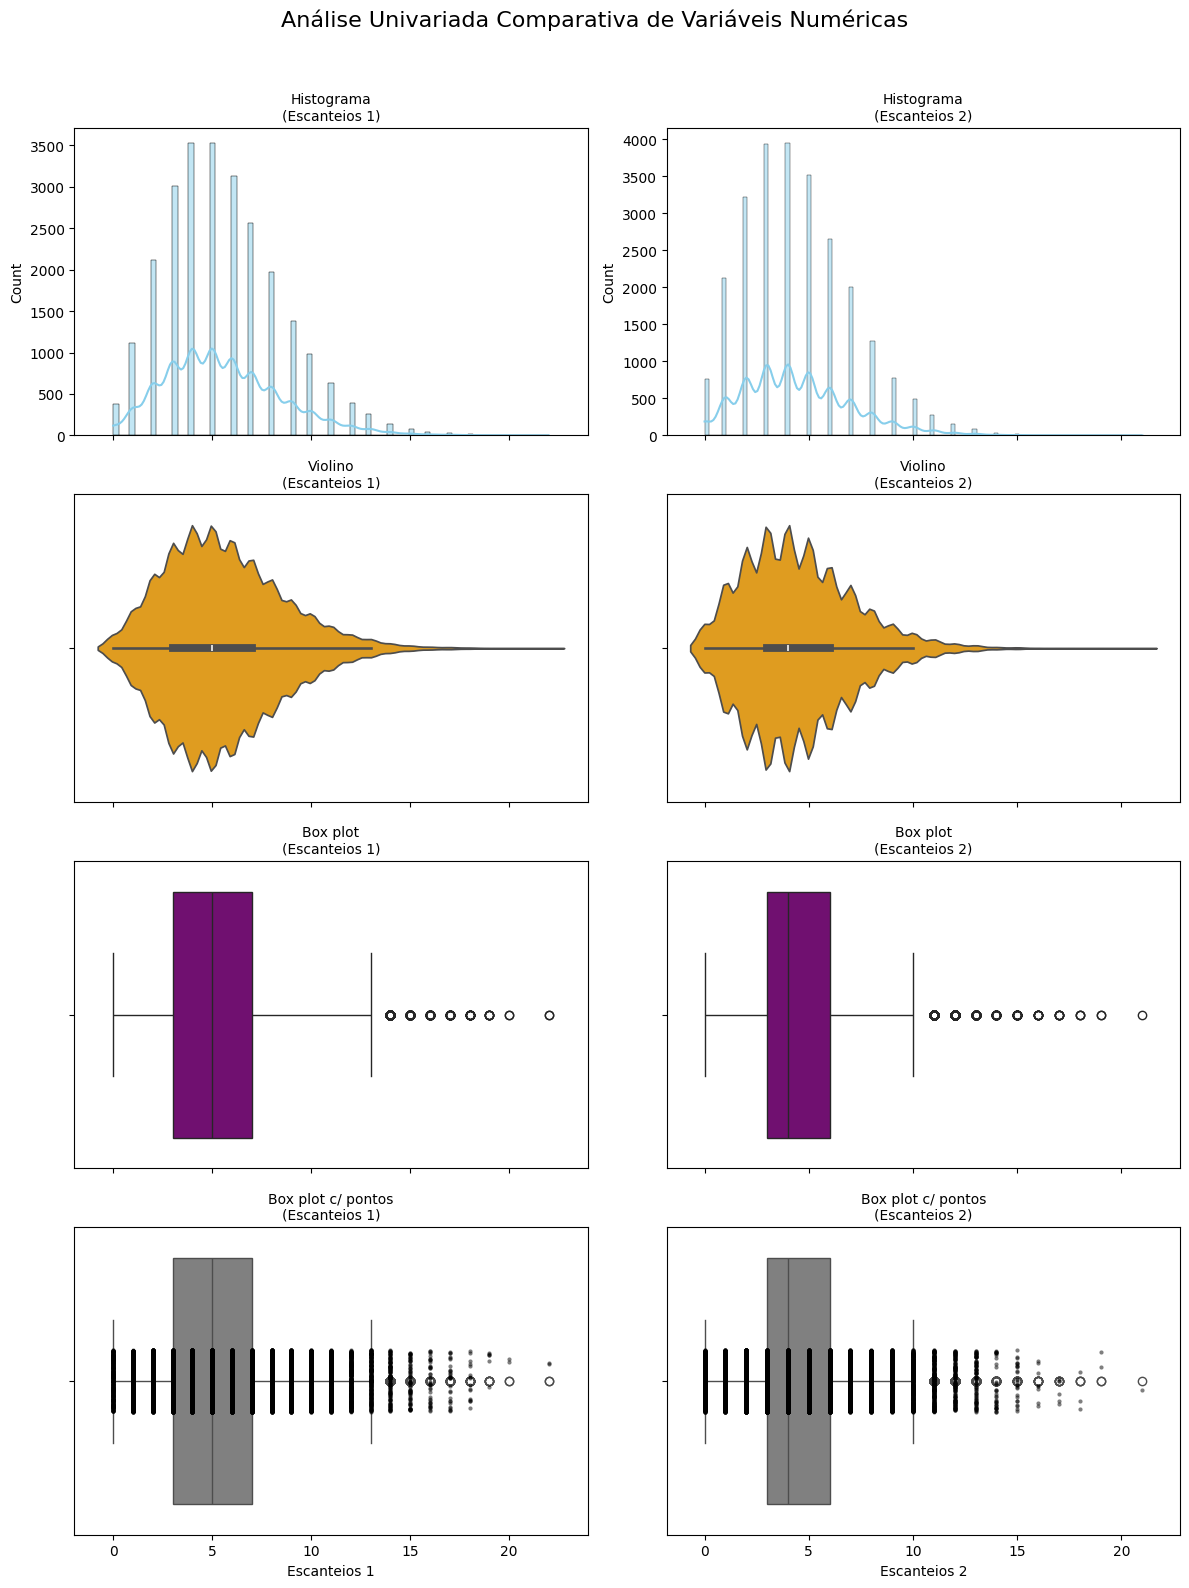


--- Análise Univariada para Variáveis Numéricas Concluída ---


In [126]:
univariada_variavel_numerica(games, ['Escanteios 1', 'Escanteios 2'])

Podemos ver uma tendência de 5.5 escanteios por jogo do time da casa, e 4.5 do time visitante, novamente com uma maior tendência de atuação de ataque pelo time da casa, o que é bem exibido pelos IQRs. Qual a relação dos escanteios com os chutes no gol? E com o número de gols? Métricas de ataque num geral?

--- Análise Univariada para Variáveis Numéricas ---

Tabela de Estatísticas Descritivas:


,count,mean,std,min,25%,50%,75%,max
Posse 1(%),25270.0,51.4045,9.4292,16.0,45.0,52.0,58.0,85.0
Posse 2(%),25270.0,48.5969,9.4293,15.0,42.0,48.0,55.0,84.0



--- Gerando gráficos lado a lado ---


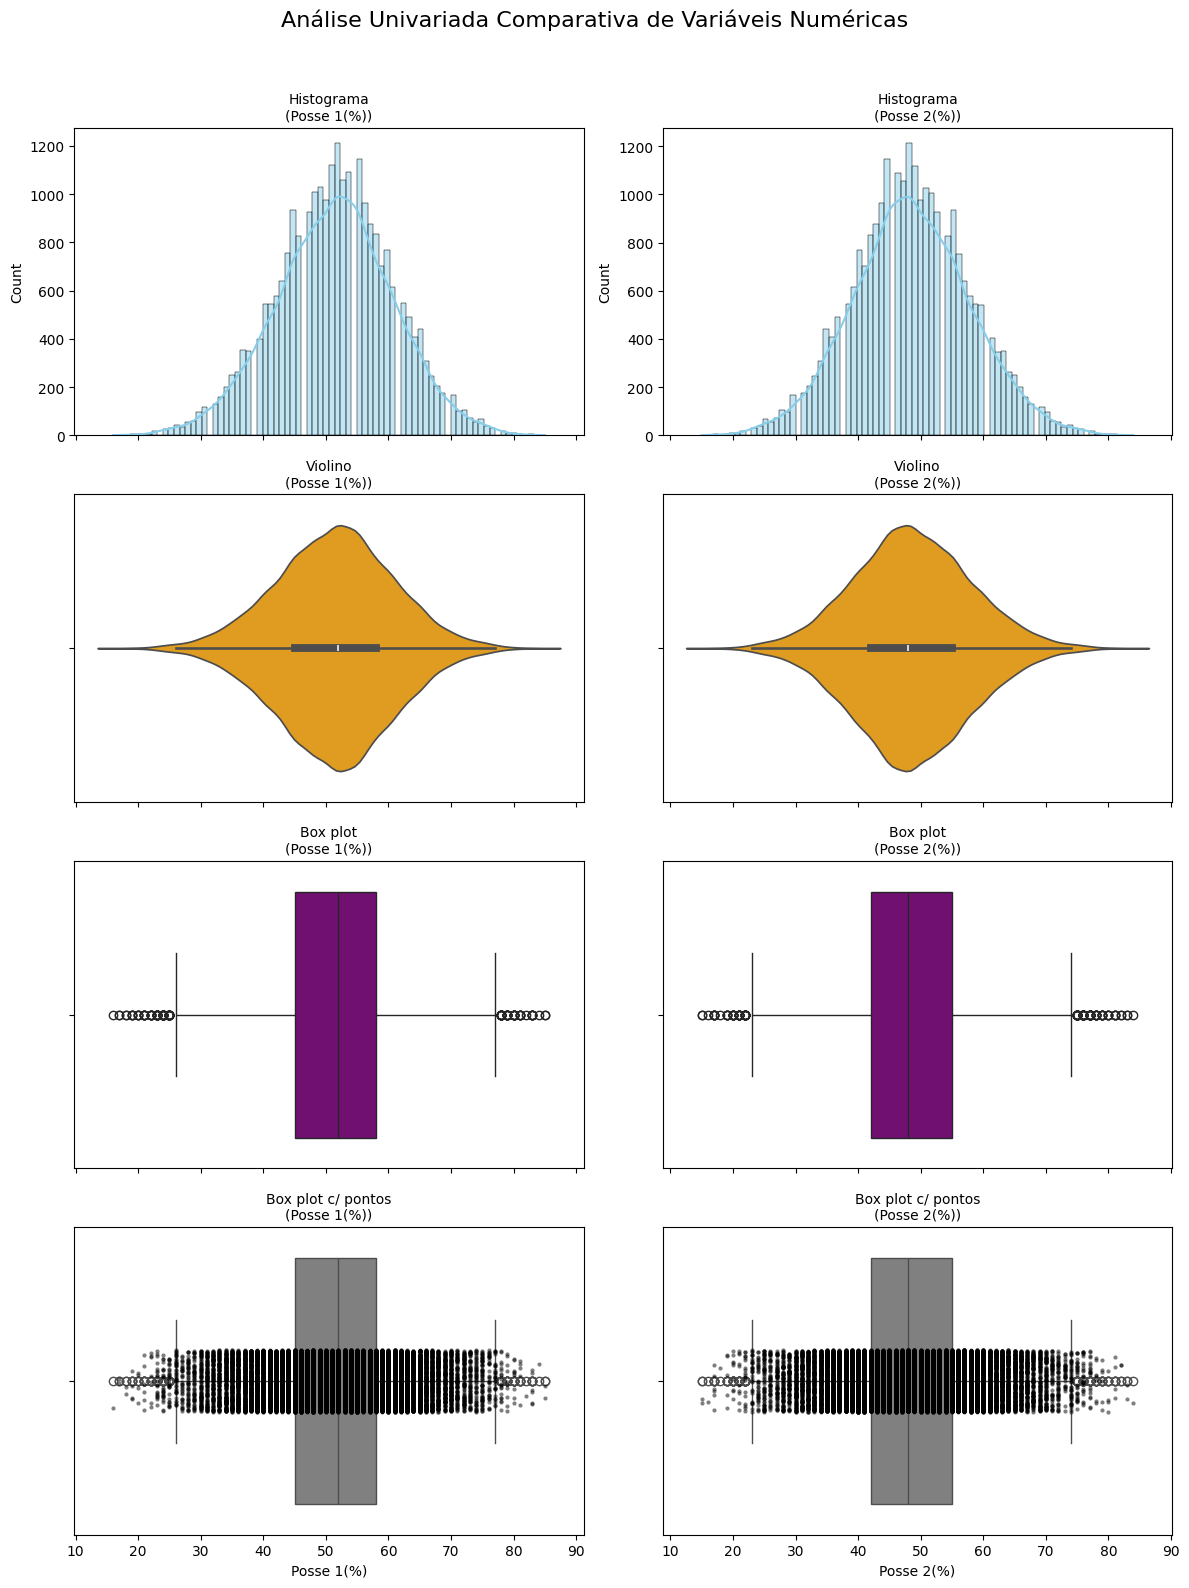


--- Análise Univariada para Variáveis Numéricas Concluída ---


In [127]:
univariada_variavel_numerica(games, ['Posse 1(%)', 'Posse 2(%)'])

- O boxplot já exibe uma clara tendência de outliers para os 15% iniciais e finais de cada gráfico. Como não faz sentido considerar jogos com 0% ou 100% de posse por algum time, e há uma clara concentração de outliers nesta faixa, estes valores foram removidos.
- Na posse de bola é possível ver claramente a assimetria entre times da casa e visitantes: o gráfico dos times da casa é assimétrico a esquerda, e o dos times visitantes é assimétrico a direita, revelando que os times da casa possuem uma tendência de maiores atuações durante o jogo
- A posse se associa com algum parâmetro de desempenho? Ou possui apenas uma relação direta com maiores tentativas? Considerando apenas os valores na média, faz alguma diferença?

--- Análise Univariada para Variáveis Categóricas ---

--- Análise de Tabela para Variável Categórica: Time 1 (1/2) ---
Describe da variável categórica: Time 1


,count,unique,top,freq
Time 1,27620,310,Roma,240


Tabela de frequência da variável categórica (com percentuais e total): Time 1


,Time 1,Frequência,Percentual (%)
0,Roma,240,0.87
1,Tottenham,239,0.87
2,Juventus,239,0.87
3,Napoli,239,0.87
4,Milan,239,0.87
...,...,...,...
306,NFC Volos,9,0.03
307,Freiburg,8,0.03
308,Hertha Berlim,8,0.03
309,Ionikos,7,0.03



--- Análise de Tabela para Variável Categórica: Time 2 (2/2) ---
Describe da variável categórica: Time 2


,count,unique,top,freq
Time 2,27620,310,Liverpool,240


Tabela de frequência da variável categórica (com percentuais e total): Time 2


,Time 2,Frequência,Percentual (%)
0,Liverpool,240,0.87
1,Lazio,240,0.87
2,Inter de Milão,239,0.87
3,Manchester City,239,0.87
4,Milan,239,0.87
...,...,...,...
306,Bayern de Munique,9,0.03
307,Union Berlin,9,0.03
308,NFC Volos,8,0.03
309,Colonia,8,0.03



--- Gerando Gráficos de Frequência Lado a Lado ---


C:\Users\carlo\AppData\Local\Temp\ipykernel_10232\896419393.py:243: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y='Frequência', data=frequency_table_plot, ax=ax, errorbar=None, palette='viridis')
C:\Users\carlo\AppData\Local\Temp\ipykernel_10232\896419393.py:243: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y='Frequência', data=frequency_table_plot, ax=ax, errorbar=None, palette='viridis')


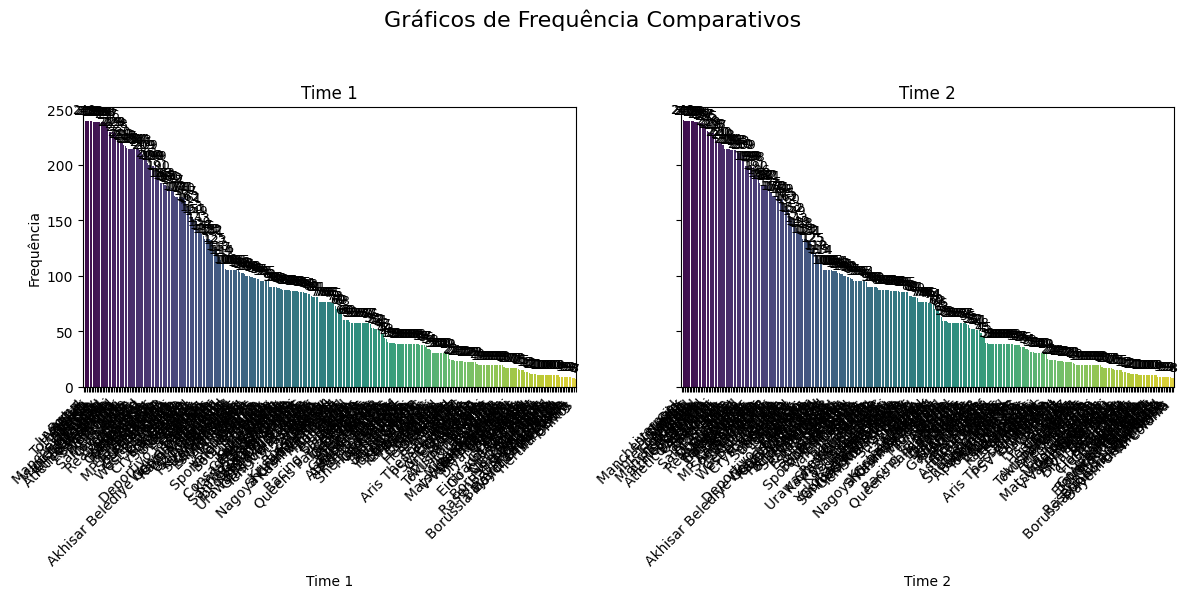


--- Análise Univariada para Variáveis Categóricas Concluída ---


In [128]:
univariada_variavel_categoria(games, ['Time 1', 'Time 2'])

São 310 times no total, porém alguns times possuem pouquíssimos jogos. Será que vale considerar todos eles no modelo? Dá pra excluir alguns times que gerem resultados com outliers fortes (como 100% de vitórias ou 100% de derrotas), ou onde seus jogos sejam com outros times que também possuem poucos jogos nos dados?

--- Análise Univariada para Variáveis Categóricas ---

--- Análise de Tabela para Variável Categórica: Position 1 (1/2) ---
Describe da variável categórica: Position 1


,count,unique,top,freq
Position 1,26018,29,4-2-3-1,7972


Tabela de frequência da variável categórica (com percentuais e total): Position 1


,Position 1,Frequência,Percentual (%)
0,4-2-3-1,7972,28.86
1,4-4-2,4865,17.61
2,4-3-3,4610,16.69
3,NaN,1602,5.80
4,3-5-2,1573,5.70
5,4-4-1-1,935,3.39
6,4-3-1-2,864,3.13
7,3-4-3,847,3.07
8,4-1-4-1,718,2.60
9,3-4-2-1,552,2.00



--- Análise de Tabela para Variável Categórica: Position 2 (2/2) ---
Describe da variável categórica: Position 2


,count,unique,top,freq
Position 2,25990,30,4-2-3-1,7829


Tabela de frequência da variável categórica (com percentuais e total): Position 2


,Position 2,Frequência,Percentual (%)
0,4-2-3-1,7829,28.35
1,4-3-3,4586,16.60
2,4-4-2,4470,16.18
3,3-5-2,1638,5.93
4,NaN,1630,5.90
5,4-4-1-1,952,3.45
6,3-4-3,882,3.19
7,4-1-4-1,829,3.00
8,4-3-1-2,793,2.87
9,4-5-1,720,2.61



--- Gerando Gráficos de Frequência Lado a Lado ---


C:\Users\carlo\AppData\Local\Temp\ipykernel_10232\896419393.py:243: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y='Frequência', data=frequency_table_plot, ax=ax, errorbar=None, palette='viridis')
C:\Users\carlo\AppData\Local\Temp\ipykernel_10232\896419393.py:243: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y='Frequência', data=frequency_table_plot, ax=ax, errorbar=None, palette='viridis')


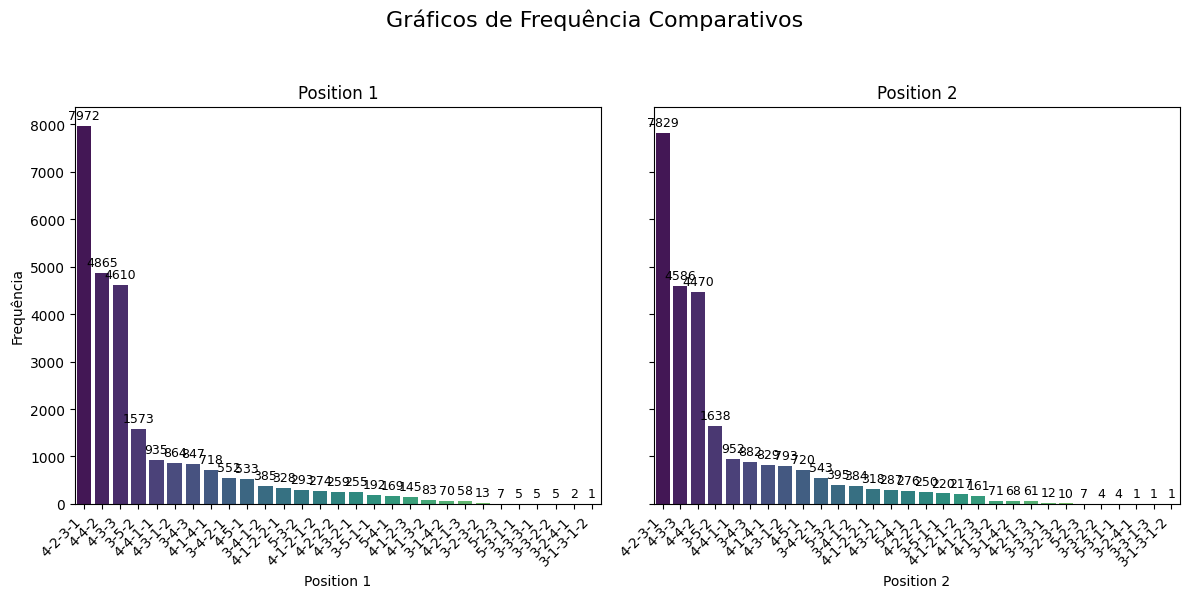


--- Análise Univariada para Variáveis Categóricas Concluída ---


In [129]:
univariada_variavel_categoria(games, ['Position 1', 'Position 2'])

- Posições relevantes: "4-2-3-1", "4-4-2", "4-3-3", e definir uma categoria "Outros" para as demais formações.
- Existe alguma relação entre as posições 4-4-2 e 4-3-3?
- Qual a relação de vitória dos times com a formação escolhida? Há alguma relação clara?

--- Análise Univariada para Variáveis Categóricas ---

--- Análise de Tabela para Variável Categórica: Resultado (1/1) ---
Describe da variável categórica: Resultado


,count,unique,top,freq
Resultado,27620,3,Casa,12449


Tabela de frequência da variável categórica (com percentuais e total): Resultado


,Resultado,Frequência,Percentual (%)
0,Casa,12449,45.07
1,Visitante,8142,29.48
2,Empate,7029,25.45
3,Total (incl. NaNs se mostrados),27620,100.00



--- Gerando Gráficos de Frequência Lado a Lado ---


C:\Users\carlo\AppData\Local\Temp\ipykernel_10232\896419393.py:243: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y='Frequência', data=frequency_table_plot, ax=ax, errorbar=None, palette='viridis')


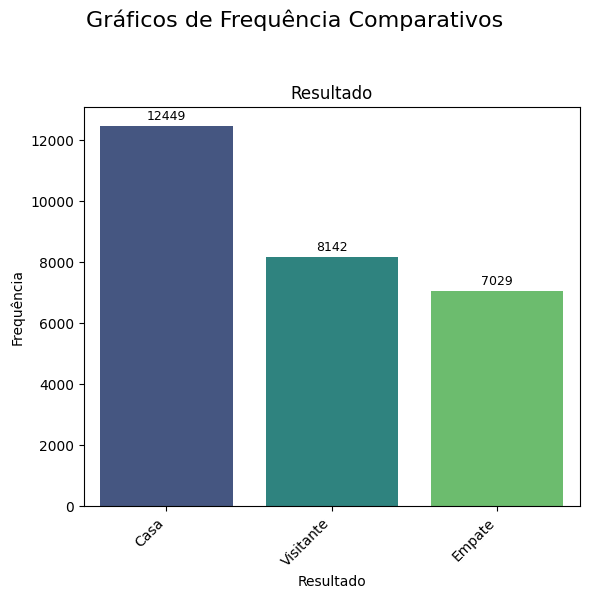


--- Análise Univariada para Variáveis Categóricas Concluída ---


In [130]:
univariada_variavel_categoria(games, ['Resultado'])

- De forma geral, é possível observar que os times da casa têm uma clara vantagem em relação aos times visitantes, com quase metade dos jogos tendendo para a vitória dos times da casa (45%).
- Isso se mantém para times de diferentes ligas, por exemplo?

# Análise de dados multivariada

- Considerando então a quantidade de dados disponíveis, vamos estudar o conjunto de dados que possui menos de 11% de dados faltantes, de forma que podemos ter um insight mais geral com uma quantidade maior de dados para as disputas entre esses times
- Os outros dados também possuem relevância, porém podemos considerar que a minoria das partidas que possuem uma quantidade grande de dados disponíveis para serem estudados. Portanto, com certeza são dados relevantes que adicionam informação no que pode ser estudado e modelado, porém devem ser analisadas separadamente, de forma a gerar um outro dataset para modelagem, ou para encontrar relações entre as variáveis com maior disponibilidade que não poderiam ser encontradas sem uma variável intermediária.

## Objetivos

- Existem dois objetivos para correlacionar as variáveis aqui:
  - Entender quais variáveis podem pesar para o resultado final do jogo
  - Entender quais variáveis impactam no número final de gols
- Entendendo quais são os parâmetros de resultado e gols, podemos traçar features que medem a eficiência dos times, para fazer uma estimativa do placar, e consequentemente, do resultado da partida

| Colunas             | Tipo de dados | Descrição                                                                                             | Resultados Iniciais                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             | Hipóteses |
|---------------------|---------------|-------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------|
| Chutes a gol 1      | float64       | Número de finalizações que foram enquadradas (ao menos foram na direção do gol) pelo time 1 / time 2. | A distribuição de chutes a gol é assimétrica para a direita. A média de chutes a gol por partida é de 4 para as duas colunas, mas claramente há uma tendência maior de chutes a gol pelos times da casa. Para 50% dos dados, há 4 chutes a gol por partida. Aqui também se observa uma distribuição mais concentrada para times da casa, enquanto times visitantes possuem mais outliers                                                                                                                                                                                                                                                                                                                                                        |           |
| Chutes a gol 2      | float64       | Número de finalizações que foram enquadradas (ao menos foram na direção do gol) pelo time 1 / time 2. | A distribuição de chutes a gol é assimétrica para a direita. A média de chutes a gol por partida é de 4 para as duas colunas, mas claramente há uma tendência maior de chutes a gol pelos times da casa. Para 50% dos dados, há 4 chutes a gol por partida. Aqui também se observa uma distribuição mais concentrada para times da casa, enquanto times visitantes possuem mais outliers                                                                                                                                                                                                                                                                                                                                                        |           |
| Impedimentos 1      | float64       | Quantas vezes cada time foi pego em posição de impedimento.                                           | Aqui, novamente, outliers com valores acima de 12 não fazem sentido, e foram removidos. As médias são praticamente as mesmas, com IQR igual para ambos times da casa e visitantes. Apenas é possível ver uma leve tendência para os times da casa, o que faz sentido com a hipótese de maior performance por parte dos times da casa num geral                                                                                                                                                                                                                                                                                                                                                                                                  |           |
| Impedimentos 2      | float64       | Quantas vezes cada time foi pego em posição de impedimento.                                           | Aqui, novamente, outliers com valores acima de 12 não fazem sentido, e foram removidos. As médias são praticamente as mesmas, com IQR igual para ambos times da casa e visitantes. Apenas é possível ver uma leve tendência para os times da casa, o que faz sentido com a hipótese de maior performance por parte dos times da casa num geral                                                                                                                                                                                                                                                                                                                                                                                                  |           |
| Escanteios 1        | float64       | Total de cobranças de escanteio a favor de cada equipe.                                               | Podemos ver uma tendência de 5.5 escanteios por jogo do time da casa, e 4.5 do time visitante, novamente com uma maior tendência de atuação de ataque pelo time da casa, o que é bem exibido pelos IQRs. Qual a relação dos escanteios com os chutes no gol? E com o número de gols? Métricas de ataque num geral?                                                                                                                                                                                                                                                                                                                                                                                                                              |           |
| Escanteios 2        | float64       | Total de cobranças de escanteio a favor de cada equipe.                                               | Podemos ver uma tendência de 5.5 escanteios por jogo do time da casa, e 4.5 do time visitante, novamente com uma maior tendência de atuação de ataque pelo time da casa, o que é bem exibido pelos IQRs. Qual a relação dos escanteios com os chutes no gol? E com o número de gols? Métricas de ataque num geral?                                                                                                                                                                                                                                                                                                                                                                                                                              |           |
| Chutes fora 1       | float64       | Finalizações que não foram na direção do gol (para fora) de cada time.                                | A distribuição dos dados é assimétrica a direita, mas o valor de 748 chutes para fora não faz o menor sentido, então removemos esta linha. A média de chutes para fora é de 6 para o time da casa e 5 para o visitante, com o valor mais frequente sendo 5 para o time da casa e 4 para o visitante. Aqui podemos assumir uma leve tendência de tentativas a mais para o time da casa que o time visitante, com pouca diferença entre os dados.                                                                                                                                                                                                                                                                                                 |           |
| Chutes fora 2       | float64       | Finalizações que não foram na direção do gol (para fora) de cada time.                                | A distribuição dos dados é assimétrica a direita, mas o valor de 748 chutes para fora não faz o menor sentido, então removemos esta linha. A média de chutes para fora é de 6 para o time da casa e 5 para o visitante, com o valor mais frequente sendo 5 para o time da casa e 4 para o visitante. Aqui podemos assumir uma leve tendência de tentativas a mais para o time da casa que o time visitante, com pouca diferença entre os dados.                                                                                                                                                                                                                                                                                                 |           |
| Faltas 1            | float64       | Quantas faltas cada time cometeu durante a partida.                                                   | Removemos alguns outliers para ambas as colunas. Na verdade, a média e mediana não é muito diferente para os times da casa e visitantes, com um IQR bem próximo para todas as faixas. Então dá pra concluir que as laterais não tem muita relação com faltas, e pode estar mais relacionado com outros dados que indiquem defesa. Todos os times cometem faltas no jogo, podendo ver que há outliers até 3/4 faltas e após 25/26 faltas. Em média, ambos os times marcam uma quantidade similar de faltas.                                                                                                                                                                                                                                      |           |
| Faltas 2            | float64       | Quantas faltas cada time cometeu durante a partida.                                                   | Removemos alguns outliers para ambas as colunas. Na verdade, a média e mediana não é muito diferente para os times da casa e visitantes, com um IQR bem próximo para todas as faixas. Então dá pra concluir que as laterais não tem muita relação com faltas, e pode estar mais relacionado com outros dados que indiquem defesa. Todos os times cometem faltas no jogo, podendo ver que há outliers até 3/4 faltas e após 25/26 faltas. Em média, ambos os times marcam uma quantidade similar de faltas.                                                                                                                                                                                                                                      |           |
| Cartões amarelos 1  | float64       | Quantos cartões amarelos foram mostrados a jogadores de cada time.                                    | Tem como usar essas variáveis como categóricas? Por exemplo, "houve cartão vermelho" para cartões vermelhos, e "0", "1-2", "3+" para cartões amarelos. Classificando de forma categórica, mesmo que times visitantes recebam uma maior quantidade de cartões amarelos, o comportamento é similar o suficiente para entendermos estatísticas como "0-1", "2-3", "4+" cartões amarelos, ou "0", "1-2", "3+" cartões amarelos por jogo. O que acontece em jogos que possuem mais de 3 cartões amarelos?                                                                                                                                                                                                                                            |           |
| Cartões amarelos 2  | float64       | Quantos cartões amarelos foram mostrados a jogadores de cada time.                                    | Tem como usar essas variáveis como categóricas? Por exemplo, "houve cartão vermelho" para cartões vermelhos, e "0", "1-2", "3+" para cartões amarelos. Classificando de forma categórica, mesmo que times visitantes recebam uma maior quantidade de cartões amarelos, o comportamento é similar o suficiente para entendermos estatísticas como "0-1", "2-3", "4+" cartões amarelos, ou "0", "1-2", "3+" cartões amarelos por jogo. O que acontece em jogos que possuem mais de 3 cartões amarelos?                                                                                                                                                                                                                                            |           |
| Cartões vermelhos 1 | float64       | Quantos cartões vermelhos foram mostrados a jogadores de cada time.                                   | Tem como usar essas variáveis como categóricas? Por exemplo, "houve cartão vermelho" para cartões vermelhos, e "0", "1-2", "3+" para cartões amarelos. Cartões vermelhos provavelmente podem ser tratados como categóricos, já que é facilmente observável o mesmo padrão para ambos os times, simplificanto a abordagem para "houve cartão vermelho?". O que acontece em jogos que possuem 1 cartão vermelho?                                                                                                                                                                                                                                                                                                                                  |           |
| Cartões vermelhos 2 | float64       | Quantos cartões vermelhos foram mostrados a jogadores de cada time.                                   | Tem como usar essas variáveis como categóricas? Por exemplo, "houve cartão vermelho" para cartões vermelhos, e "0", "1-2", "3+" para cartões amarelos. Cartões vermelhos provavelmente podem ser tratados como categóricos, já que é facilmente observável o mesmo padrão para ambos os times, simplificanto a abordagem para "houve cartão vermelho?". O que acontece em jogos que possuem 1 cartão vermelho?                                                                                                                                                                                                                                                                                                                                  |           |
| Gols 1              | float64       | Número de gols marcados por cada time.                                                                | A distribuição de gols é assimétrica a direita, onde times da casa possuem menos partidas com 0 gols, e com uma média de 1.52, mas uma mediana de 1.29, revelando que há um número significativo de partidas com 2 gols além de partidas com 1 gol. Q3 é 2, revelando que a maioria das partidas terão até 2 gols. Times da casa apresentam outliers acima de 3 gols.                                                                                                                                                                                                                                                                                                                                                                           |           |
| Gols 2              | float64       | Número de gols marcados por cada time.                                                                | A distribuição de gols é assimétrica a direita, possuindo a tendência de 1 gol por partida, e no Q1 não há gols. Q3 é 2, revelando que a maioria das partidas terão até 2 gols. Times visitantes apresentam outliers apenas a partir de 5 gols.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |           |
| Posse 1(%)          | float64       | Percentual de tempo de posse de bola de cada equipe ao longo da partida.                              | O boxplot já exibe uma clara tendência de outliers para os 15% iniciais e finais de cada gráfico. Como não faz sentido considerar jogos com 0% ou 100% de posse por algum time, e há uma clara concentração de outliers nesta faixa, estes valores foram removidos. Na posse de bola é possível ver claramente a assimetria entre times da casa e visitantes: o gráfico dos times da casa é assimétrico a esquerda, e o dos times visitantes é assimétrico a direita, revelando que os times da casa possuem uma tendência de maiores atuações durante o jogo. A posse se associa com algum parâmetro de desempenho? Ou possui apenas uma relação direta com maiores tentativas? Considerando apenas os valores na média, faz alguma diferença? |           |
| Posse 2(%)          | float64       | Percentual de tempo de posse de bola de cada equipe ao longo da partida.                              | O boxplot já exibe uma clara tendência de outliers para os 15% iniciais e finais de cada gráfico. Como não faz sentido considerar jogos com 0% ou 100% de posse por algum time, e há uma clara concentração de outliers nesta faixa, estes valores foram removidos. Na posse de bola é possível ver claramente a assimetria entre times da casa e visitantes: o gráfico dos times da casa é assimétrico a esquerda, e o dos times visitantes é assimétrico a direita, revelando que os times da casa possuem uma tendência de maiores atuações durante o jogo. A posse se associa com algum parâmetro de desempenho? Ou possui apenas uma relação direta com maiores tentativas? Considerando apenas os valores na média, faz alguma diferença? |           |
| Time 1              | string        | Nome do time da casa (1) e do time visitante (2).                                                     | São 310 times no total, porém alguns times possuem pouquíssimos jogos. Será que vale considerar todos eles no modelo? Dá pra excluir alguns times que gerem resultados com outliers fortes (como 100% de vitórias ou 100% de derrotas), ou onde seus jogos sejam com outros times que também possuem poucos jogos nos dados?                                                                                                                                                                                                                                                                                                                                                                                                                    |           |
| Time 2              | string        | Nome do time da casa (1) e do time visitante (2).                                                     | São 310 times no total, porém alguns times possuem pouquíssimos jogos. Será que vale considerar todos eles no modelo? Dá pra excluir alguns times que gerem resultados com outliers fortes (como 100% de vitórias ou 100% de derrotas), ou onde seus jogos sejam com outros times que também possuem poucos jogos nos dados?                                                                                                                                                                                                                                                                                                                                                                                                                    |           |
| Position 1          | string        | Posição tática inicial ou formação de cada equipe (por exemplo: 4-4-2, 3-5-2 etc.).                   | Posições relevantes: "4-2-3-1", "4-4-2", "4-3-3", e definir uma categoria "Outros" para as demais formações. Existe alguma relação entre as posições 4-4-2 e 4-3-3? Qual a relação de vitória dos times com a formação escolhida? Há alguma relação clara?                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |           |
| Position 2          | string        | Posição tática inicial ou formação de cada equipe (por exemplo: 4-4-2, 3-5-2 etc.).                   | Posições relevantes: "4-2-3-1", "4-4-2", "4-3-3", e definir uma categoria "Outros" para as demais formações. Existe alguma relação entre as posições 4-4-2 e 4-3-3? Qual a relação de vitória dos times com a formação escolhida? Há alguma relação clara?                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |           |


In [131]:
# Adicionando as ligas de cada time

liga_time = []
ligas = {
    0 : 'Escoces',
    1 : 'Japones',
    2 : 'Noruegues',
    3 : 'Grego',
    4 : 'Italiano',
    5 : 'Turco',
    6 : 'Alemao',
    7 : 'Frances',
    8 : 'Espanhol',
    9 : 'Holandes',
    10 : 'Ingles'
}
for i in range(len(games)):
  if(i <= 1216):
    liga_time.append(ligas[0])
  elif(i <= 2819):
    liga_time.append(ligas[1])
  elif(i <= 4497):
    liga_time.append(ligas[2])
  elif(i <= 5093):
    liga_time.append(ligas[3])
  elif(i <= 9866):
    liga_time.append(ligas[4])
  elif(i <= 13517):
    liga_time.append(ligas[5])
  elif(i <= 13688):
    liga_time.append(ligas[6])
  elif(i <= 17964):
    liga_time.append(ligas[7])
  elif(i <= 22543):
    liga_time.append(ligas[8])
  elif(i <= 22953):
    liga_time.append(ligas[9])
  elif(i <= 27715):
    liga_time.append(ligas[10])

games['Liga'] = liga_time
games

,Chutes a gol 1,Chutes a gol 2,Impedimentos 1,Impedimentos 2,Escanteios 1,Escanteios 2,Chutes fora 1,Chutes fora 2,Faltas 1,Faltas 2,...,Defesas difíceis 1,Defesas difíceis 2,Posse 1(%),Posse 2(%),Time 1,Time 2,Position 1,Position 2,Resultado,Liga
0,8.0,0.0,6.0,3.0,7.0,1.0,6.0,1.0,8.0,14.0,...,NaN,NaN,77.0,23.0,Glasgow Rangers,Livingston,4-3-3,4-3-3,Casa,Escoces
1,0.0,2.0,0.0,2.0,0.0,4.0,3.0,4.0,19.0,14.0,...,NaN,NaN,44.0,56.0,Ross County,St.Johnstone,3-5-2,3-5-2,Empate,Escoces
2,4.0,5.0,1.0,5.0,8.0,11.0,2.0,5.0,13.0,14.0,...,NaN,NaN,47.0,53.0,Dundee FC,St. Mirren,4-3-3,3-4-1-2,Empate,Escoces
3,4.0,7.0,8.0,1.0,6.0,5.0,4.0,7.0,4.0,11.0,...,NaN,NaN,27.0,73.0,Hearts,Celtic,3-4-3,4-2-3-1,Casa,Escoces
4,3.0,1.0,1.0,3.0,5.0,4.0,2.0,2.0,12.0,17.0,...,NaN,NaN,58.0,42.0,Aberdeen,Dundee U.,4-4-2,3-5-1-1,Casa,Escoces
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27711,6.0,2.0,1.0,0.0,9.0,6.0,6.0,5.0,7.0,7.0,...,NaN,NaN,52.0,48.0,Aston Villa,Blackburn,4-4-2,4-5-1,Visitante,Ingles
27712,6.0,0.0,4.0,3.0,4.0,2.0,8.0,2.0,11.0,9.0,...,NaN,NaN,52.0,48.0,Arsenal,Fulham,4-2-3-1,4-4-2,Casa,Ingles
27713,7.0,7.0,2.0,3.0,10.0,2.0,8.0,0.0,10.0,6.0,...,NaN,NaN,55.0,45.0,Manchester Utd,Stoke,4-4-2,4-4-2,Casa,Ingles
27714,6.0,6.0,1.0,2.0,4.0,3.0,4.0,6.0,5.0,3.0,...,NaN,NaN,45.0,55.0,West Ham,Manchester City,4-5-1,4-4-2,Empate,Ingles


In [132]:
# Define the threshold for the percentage of missing data
threshold = 11  # Adjust this value as needed

# Calculate the percentage of missing data for each column
column_missing_percentage = games.isnull().sum() / games.shape[0] * 100

# Identify columns where the percentage of missing data is greater than the threshold
columns_to_drop = column_missing_percentage[column_missing_percentage > threshold].index

# Remove the identified columns from the DataFrame
filtered_games = games.drop(columns=columns_to_drop).dropna()

## Removing the same data as before
# filtered_games.drop(filtered_games[filtered_games["Chutes fora 2"] == 748.0].index, inplace=True)
# filtered_games.drop(filtered_games[filtered_games["Chutes a gol 1"] == 90.0].index, inplace=True)
# filtered_games.drop(filtered_games[filtered_games["Chutes a gol 2"].isin([80.0, 30.0])].index, inplace=True)
# filtered_games.drop(filtered_games[(filtered_games["Faltas 1"] > 40.0) | (filtered_games["Faltas 2"] > 40.0)].index, inplace=True)
# filtered_games.drop(filtered_games[(filtered_games["Impedimentos 1"] > 12.0) | (filtered_games["Impedimentos 2"] > 12.0)].index, inplace=True)
# filtered_games.drop(filtered_games[(filtered_games["Posse 1(%)"] < 15.0) | (filtered_games["Posse 1(%)"] > 85.0)].index, inplace=True)
# filtered_games.drop(filtered_games[(filtered_games["Posse 2(%)"] < 15.0) | (filtered_games["Posse 2(%)"] > 85.0)].index, inplace=True)

filtered_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23369 entries, 0 to 27714
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Chutes a gol 1       23369 non-null  float64
 1   Chutes a gol 2       23369 non-null  float64
 2   Impedimentos 1       23369 non-null  float64
 3   Impedimentos 2       23369 non-null  float64
 4   Escanteios 1         23369 non-null  float64
 5   Escanteios 2         23369 non-null  float64
 6   Chutes fora 1        23369 non-null  float64
 7   Chutes fora 2        23369 non-null  float64
 8   Faltas 1             23369 non-null  float64
 9   Faltas 2             23369 non-null  float64
 10  Cartões amarelos 1   23369 non-null  float64
 11  Cartões amarelos 2   23369 non-null  float64
 12  Cartões vermelhos 1  23369 non-null  float64
 13  Cartões vermelhos 2  23369 non-null  float64
 14  Gols 1               23369 non-null  float64
 15  Gols 2               23369 non-null  floa

In [133]:
print(filtered_games.describe(include='all'))

        Chutes a gol 1  Chutes a gol 2  Impedimentos 1  Impedimentos 2  \
count     23369.000000    23369.000000    23369.000000    23369.000000   
unique             NaN             NaN             NaN             NaN   
top                NaN             NaN             NaN             NaN   
freq               NaN             NaN             NaN             NaN   
mean          4.895845        3.951431        2.153537        1.985451   
std           2.725334        2.371085        1.747977        1.676930   
min           0.000000        0.000000        0.000000        0.000000   
25%           3.000000        2.000000        1.000000        1.000000   
50%           5.000000        4.000000        2.000000        2.000000   
75%           6.000000        5.000000        3.000000        3.000000   
max          23.000000       22.000000       12.000000       12.000000   

        Escanteios 1  Escanteios 2  Chutes fora 1  Chutes fora 2  \
count   23369.000000  23369.000000   23369.

- Podemos observar que ao remover as colunas com menos dados, os dados removidos na análise univariada não estão mais presentes.

In [134]:
# Calcula a porcentagem de cada resultado por liga
analise_por_liga_percent = games.groupby('Liga')['Resultado'].value_counts(normalize=True) * 100

# Transforma a série resultante em um DataFrame
analise_por_liga_percent_df = analise_por_liga_percent.unstack()

# Garante que todas as ligas tenham as colunas 'Casa', 'Visitante' e 'Empate'
resultados_esperados = ['Casa', 'Visitante', 'Empate']
for resultado in resultados_esperados:
    if resultado not in analise_por_liga_percent_df.columns:
        analise_por_liga_percent_df[resultado] = 0

# Seleciona apenas as colunas 'Casa', 'Visitante' e 'Empate' e as reordena
analise_por_liga_percent_df = analise_por_liga_percent_df[resultados_esperados]

# Reseta o índice para que 'Resultado' seja uma coluna
analise_por_liga_percent_df = analise_por_liga_percent_df.reset_index()

# Renomeia a coluna 'index' para 'Resultado'
analise_por_liga_percent_df = analise_por_liga_percent_df.rename(columns={'index': 'Resultado'})

analise_por_liga_percent_df = analise_por_liga_percent_df.sort_values(by='Casa', ascending=False)

print(analise_por_liga_percent_df)

Resultado       Liga       Casa  Visitante     Empate
2           Espanhol  47.477615  27.975541  24.546844
4              Grego  46.476510  28.020134  25.503356
9          Noruegues  46.185936  27.711561  26.102503
6             Ingles  45.370767  30.154308  24.474925
10             Turco  45.110929  28.321008  26.568064
5           Holandes  44.878049  31.951220  23.170732
7           Italiano  44.856484  29.708779  25.434737
3            Frances  44.059869  28.461179  27.478952
0             Alemao  43.859649  26.900585  29.239766
1            Escoces  42.728020  33.525062  23.746919
8            Japones  40.860886  35.433562  23.705552


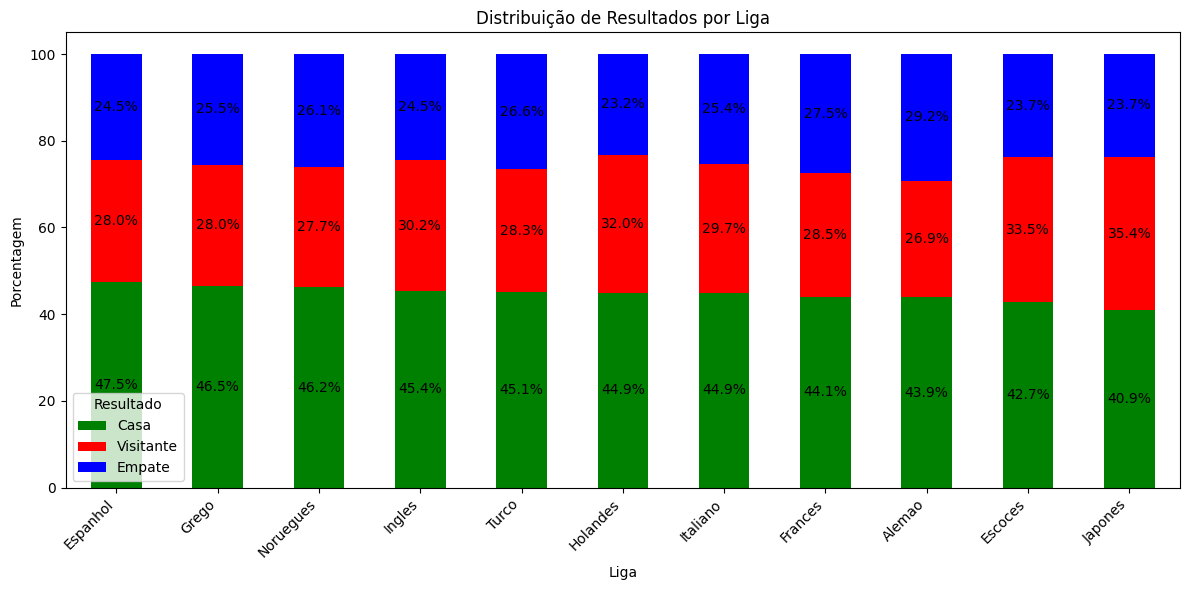

In [135]:
# Define as cores para cada resultado
cores = {'Casa': 'green', 'Visitante': 'red', 'Empate': 'blue'}

# Define a ordem dos resultados para o empilhamento
ordem_resultados = ['Casa', 'Visitante', 'Empate']

# Define 'Liga' como índice
analise_por_liga_percent_df = analise_por_liga_percent_df.set_index('Liga')

# Reordena as colunas de acordo com a ordem desejada
analise_por_liga_percent_df = analise_por_liga_percent_df[ordem_resultados]

# Plota o gráfico de barras empilhadas
ax = analise_por_liga_percent_df.plot(kind='bar', stacked=True, figsize=(12, 6), color=[cores[resultado] for resultado in ordem_resultados])

# Adiciona rótulos e título
plt.title('Distribuição de Resultados por Liga')
plt.ylabel('Porcentagem')
plt.xlabel('Liga')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor legibilidade

# Adiciona legenda
plt.legend(title='Resultado')

# Adiciona anotações com os valores das porcentagens
for n, x in enumerate(ax.patches):
    width, height = x.get_width(), x.get_height()
    if height > 0:
        ax.text(x.get_x() + width/2,
                x.get_y() + height/2,
                f'{height:.1f}%',
                ha='center', va='center')

# Mostra o gráfico
plt.tight_layout()
plt.show()

- Há uma tendência clara dos times da casa dominarem nos campeonatos Espanhol, Grego e Norueguês
- O resultado menos frequente é o empate para todos os campeonatos
- Alguns campeonatos exibem uma tendência mais equilibrada entre vitórias do time da casa e visitante, como o campeonato Holandês, Japonês e Escocês

In [136]:
# Transformando os cartões vermelhos para "sim" e "não"
# Converter as colunas para booleanas
filtered_games['Cartões vermelhos 1'] = filtered_games['Cartões vermelhos 1'].apply(lambda x: 'sim' if x > 0 else 'não')
filtered_games['Cartões vermelhos 2'] = filtered_games['Cartões vermelhos 2'].apply(lambda x: 'sim' if x > 0 else 'não')

# Exibir os valores únicos de cada coluna para verificar a transformação
print("Valores únicos em 'Cartões vermelhos 1':", filtered_games['Cartões vermelhos 1'].unique())
print("Valores únicos em 'Cartões vermelhos 2':", filtered_games['Cartões vermelhos 2'].unique())

Valores únicos em 'Cartões vermelhos 1': ['não' 'sim']
Valores únicos em 'Cartões vermelhos 2': ['não' 'sim']


Tabela de Contingência (Porcentagens):
 Resultado                 Casa     Empate  Visitante
Cartões vermelhos 1                                 
não                  46.220642  25.105732  28.673625
sim                  24.321960  26.509186  49.168854


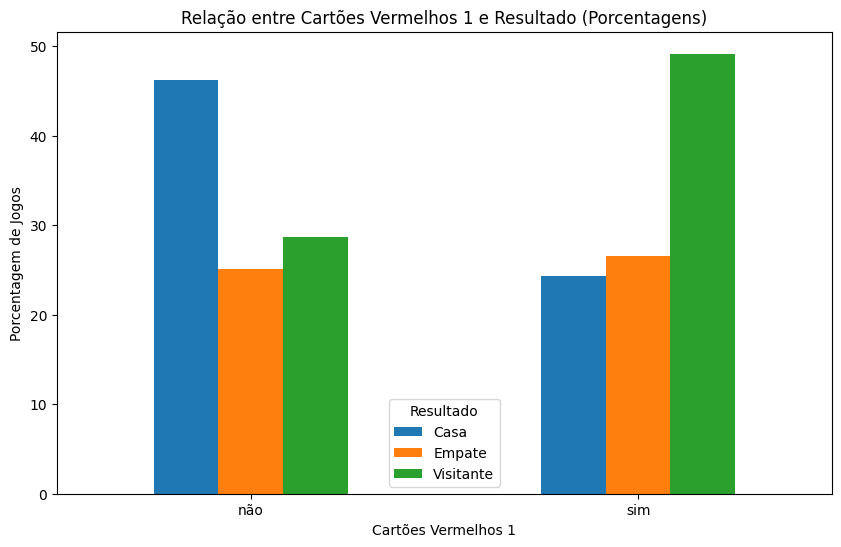

In [152]:
# Criar a tabela de contingência
tabela_contingencia = pd.crosstab(filtered_games['Cartões vermelhos 1'], filtered_games['Resultado'])

# Calcular as porcentagens dentro de cada categoria de Cartões Vermelhos 1
tabela_contingencia_pct = tabela_contingencia.div(tabela_contingencia.sum(axis=1), axis=0) * 100

print("Tabela de Contingência (Porcentagens):\n", tabela_contingencia_pct)

# Criar o gráfico de barras lado a lado
tabela_contingencia_pct.plot(kind='bar', figsize=(10, 6))
plt.title('Relação entre Cartões Vermelhos 1 e Resultado (Porcentagens)')
plt.xlabel('Cartões Vermelhos 1')
plt.ylabel('Porcentagem de Jogos')
plt.legend(title='Resultado')
plt.xticks(rotation=0)  # Manter os rótulos do eixo x na horizontal
plt.show()

Tabela de Contingência (Porcentagens):
 Resultado                 Casa     Empate  Visitante
Cartões vermelhos 2                                 
não                  44.096484  25.320179  30.583337
sim                  63.443396  22.641509  13.915094


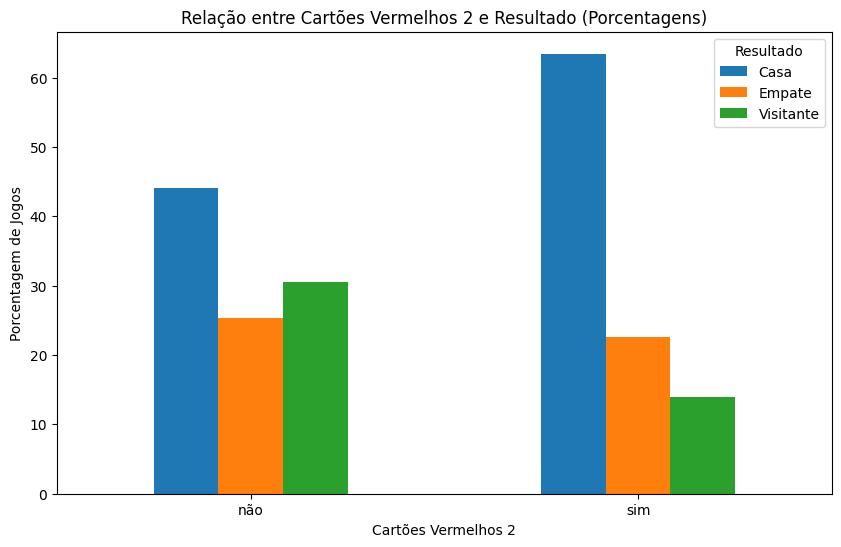

In [138]:
# Criar a tabela de contingência
tabela_contingencia = pd.crosstab(filtered_games['Cartões vermelhos 2'], filtered_games['Resultado'])

# Calcular as porcentagens dentro de cada categoria de Cartões Vermelhos 1
tabela_contingencia_pct = tabela_contingencia.div(tabela_contingencia.sum(axis=1), axis=0) * 100

print("Tabela de Contingência (Porcentagens):\n", tabela_contingencia_pct)

# Criar o gráfico de barras lado a lado
tabela_contingencia_pct.plot(kind='bar', figsize=(10, 6))
plt.title('Relação entre Cartões Vermelhos 2 e Resultado (Porcentagens)')
plt.xlabel('Cartões Vermelhos 2')
plt.ylabel('Porcentagem de Jogos')
plt.legend(title='Resultado')
plt.xticks(rotation=0)  # Manter os rótulos do eixo x na horizontal
plt.show()

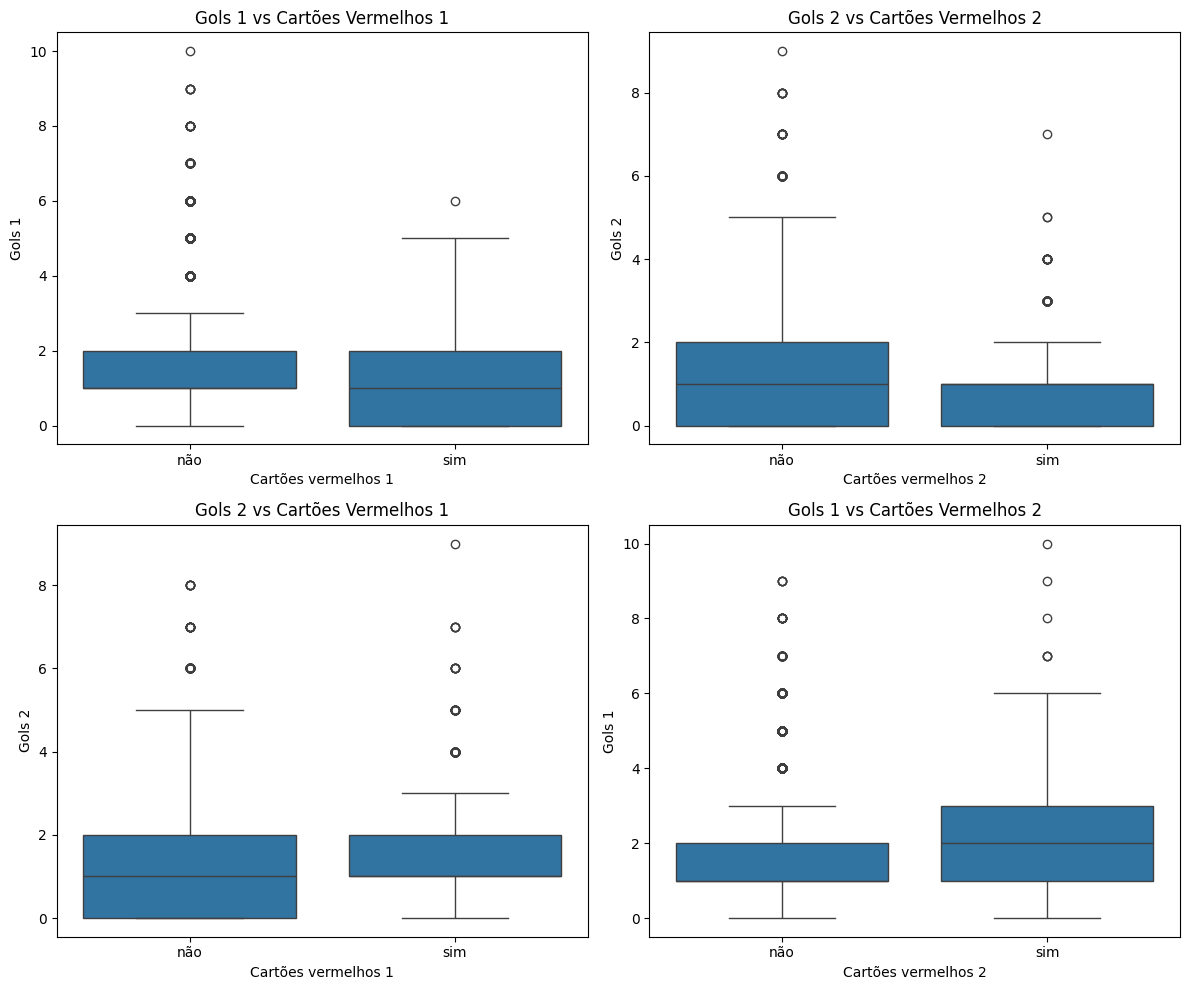

In [151]:
# Criar a figura e os subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Boxplot para "Cartões vermelhos 1" com "Gols 1"
sns.boxplot(x='Cartões vermelhos 1', y='Gols 1', data=filtered_games, ax=axes[0, 0])
axes[0, 0].set_title('Gols 1 vs Cartões Vermelhos 1')

# Boxplot para "Cartões vermelhos 2" com "Gols 2"
sns.boxplot(x='Cartões vermelhos 2', y='Gols 2', data=filtered_games, ax=axes[0, 1])
axes[0, 1].set_title('Gols 2 vs Cartões Vermelhos 2')

# Boxplot para "Cartões vermelhos 2" com "Gols 1"
sns.boxplot(x='Cartões vermelhos 2', y='Gols 1', data=filtered_games, ax=axes[1, 1])
axes[1, 1].set_title('Gols 1 vs Cartões Vermelhos 2')

# Boxplot para "Cartões vermelhos 1" com "Gols 2"
sns.boxplot(x='Cartões vermelhos 1', y='Gols 2', data=filtered_games, ax=axes[1, 0])
axes[1, 0].set_title('Gols 2 vs Cartões Vermelhos 1')

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

In [139]:
# Transformando os cartões amarelos em categorias
def categorizar_cartoes_amarelos(valor):
    if valor == 0:
        return '0'
    elif 1 <= valor <= 3:
        return '1-3'
    else:
        return '4+'

filtered_games['Cartões amarelos 1'] = filtered_games['Cartões amarelos 1'].apply(categorizar_cartoes_amarelos)
filtered_games['Cartões amarelos 2'] = filtered_games['Cartões amarelos 2'].apply(categorizar_cartoes_amarelos)

# Exibir os valores únicos de cada coluna para verificar a transformação
print("Valores únicos em 'Cartões amarelos 1':", filtered_games['Cartões amarelos 1'].unique())
print("Valores únicos em 'Cartões amarelos 2':", filtered_games['Cartões amarelos 2'].unique())

Valores únicos em 'Cartões amarelos 1': ['0' '4+' '1-3']
Valores únicos em 'Cartões amarelos 2': ['4+' '1-3' '0']


Tabela de Contingência (Porcentagens):
 Resultado                Casa     Empate  Visitante
Cartões amarelos 1                                 
0                   54.663423  21.654501  23.682076
1-3                 44.461466  25.400660  30.137874
4+                  36.434396  28.576723  34.988881


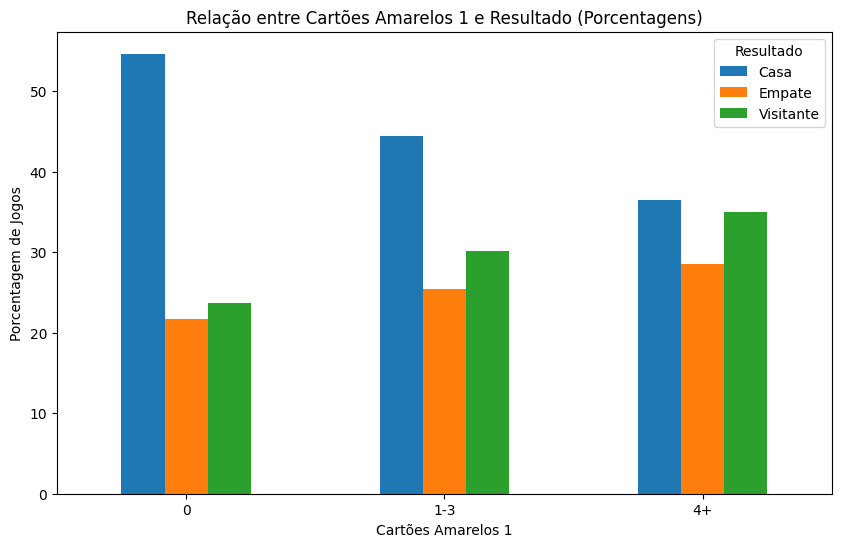

In [141]:
# Criar a tabela de contingência
tabela_contingencia = pd.crosstab(filtered_games['Cartões amarelos 1'], filtered_games['Resultado'])

# Calcular as porcentagens dentro de cada categoria de Cartões Vermelhos 1
tabela_contingencia_pct = tabela_contingencia.div(tabela_contingencia.sum(axis=1), axis=0) * 100

print("Tabela de Contingência (Porcentagens):\n", tabela_contingencia_pct)

# Criar o gráfico de barras lado a lado
tabela_contingencia_pct.plot(kind='bar', figsize=(10, 6))
plt.title('Relação entre Cartões Amarelos 1 e Resultado (Porcentagens)')
plt.xlabel('Cartões Amarelos 1')
plt.ylabel('Porcentagem de Jogos')
plt.legend(title='Resultado')
plt.xticks(rotation=0)  # Manter os rótulos do eixo x na horizontal
plt.show()

Tabela de Contingência (Porcentagens):
 Resultado                Casa     Empate  Visitante
Cartões amarelos 2                                 
0                   41.985601  22.584312  35.430087
1-3                 45.794611  24.735519  29.469870
4+                  44.407622  29.135598  26.456780


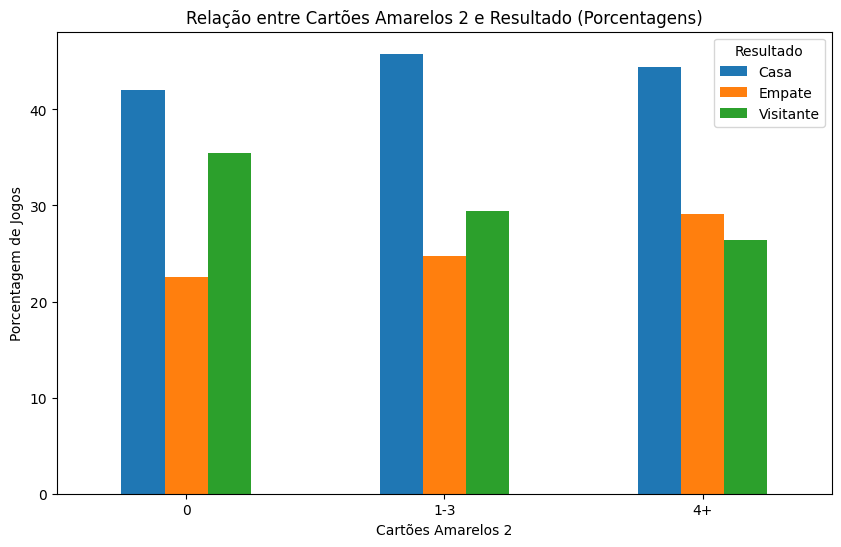

In [142]:
# Criar a tabela de contingência
tabela_contingencia = pd.crosstab(filtered_games['Cartões amarelos 2'], filtered_games['Resultado'])

# Calcular as porcentagens dentro de cada categoria de Cartões Vermelhos 1
tabela_contingencia_pct = tabela_contingencia.div(tabela_contingencia.sum(axis=1), axis=0) * 100

print("Tabela de Contingência (Porcentagens):\n", tabela_contingencia_pct)

# Criar o gráfico de barras lado a lado
tabela_contingencia_pct.plot(kind='bar', figsize=(10, 6))
plt.title('Relação entre Cartões Amarelos 2 e Resultado (Porcentagens)')
plt.xlabel('Cartões Amarelos 2')
plt.ylabel('Porcentagem de Jogos')
plt.legend(title='Resultado')
plt.xticks(rotation=0)  # Manter os rótulos do eixo x na horizontal
plt.show()

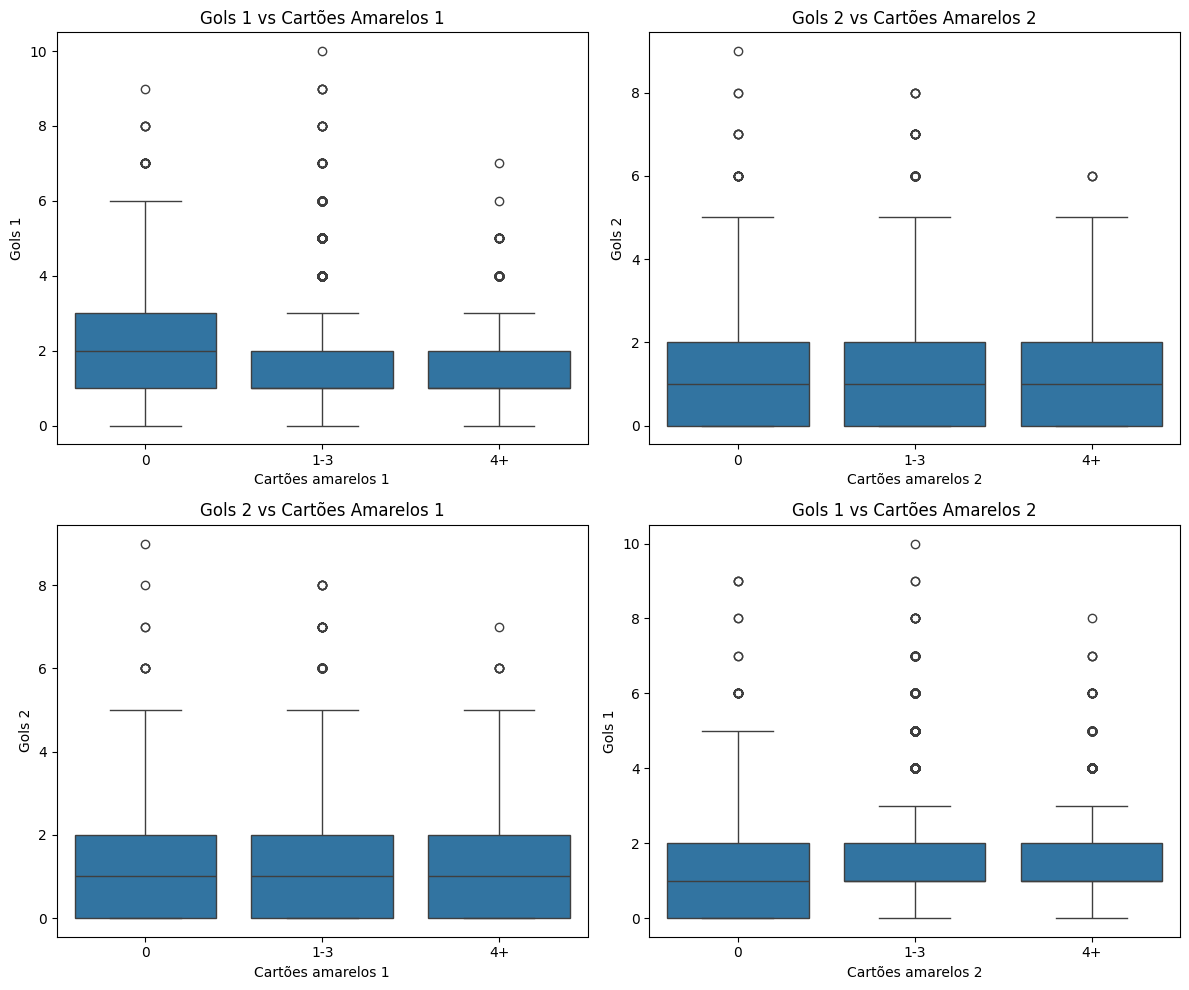

In [154]:
# Criar a figura e os subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

ordem = ['0', '1-3', '4+']

# Boxplot para "Cartões vermelhos 1" com "Gols 1"
sns.boxplot(x='Cartões amarelos 1', y='Gols 1', data=filtered_games, ax=axes[0, 0], order=ordem)
axes[0, 0].set_title('Gols 1 vs Cartões Amarelos 1')

# Boxplot para "Cartões vermelhos 2" com "Gols 2"
sns.boxplot(x='Cartões amarelos 2', y='Gols 2', data=filtered_games, ax=axes[0, 1], order=ordem)
axes[0, 1].set_title('Gols 2 vs Cartões Amarelos 2')

# Boxplot para "Cartões vermelhos 2" com "Gols 1"
sns.boxplot(x='Cartões amarelos 2', y='Gols 1', data=filtered_games, ax=axes[1, 1], order=ordem)
axes[1, 1].set_title('Gols 1 vs Cartões Amarelos 2')

# Boxplot para "Cartões vermelhos 1" com "Gols 2"
sns.boxplot(x='Cartões amarelos 1', y='Gols 2', data=filtered_games, ax=axes[1, 0], order=ordem)
axes[1, 0].set_title('Gols 2 vs Cartões Amarelos 1')

# Ajustar o layout para evitar sobreposição
plt.tight_layout()